# Project Title: **Cardio Vascular Disease Prediction using Machine Learning**

Dataset Link: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

Data Description:

There are 3 type of input features:

1. Objective: factual information
2. Examination: result of medical examination
3. Subjective: information given by the patient

Features

1. Age int (days) 
2. Height int (cm)
3. Weight int (kg)
4. Gender categorical (1 - women, 2 - men)
5. Systolic Blood Pressure int
6. Diastolic Blood Pressure int
7. Cholesterol ( 1: normal 2: above 3: well above normal)
8. Glucose ( 1: normal 2: above 3: well above normal)
9. Smoking ( 0: Smoker 1: Non Smoker)
10. Alchol Intake ( 0: Alcholic 1: Non Alcoholic)
11. Physical Activity (0: No Excercise 1: Excerice)
12. Presence or Absense of Cardiovascular Disease (0: Disease 1: No Disease)



In [395]:
# Data Analysis
import pandas as pd
# Data Computation
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Ignoring some warnings
import warnings
warnings.filterwarnings('ignore')
## Feature Selection
# Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier
## Machine Learning Implementation
# Split up the Data
from sklearn.model_selection import train_test_split, cross_val_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# XG Boost Classifier
from xgboost import XGBClassifier
# Navie Bayes - Gaussian Naive Baye
from sklearn.naive_bayes import GaussianNB
# Evaluation the Model
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Saving Model
import pickle

In [2]:
df = pd.read_excel("/content/drive/MyDrive/cardio_train.xlsx")

In [3]:
df = df.drop(labels="id",axis=1)

## **Data Exploration (Exploratory Data Analysis or EDA)**

In [4]:
df.head(5)

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.tail(5)

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [6]:
df["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

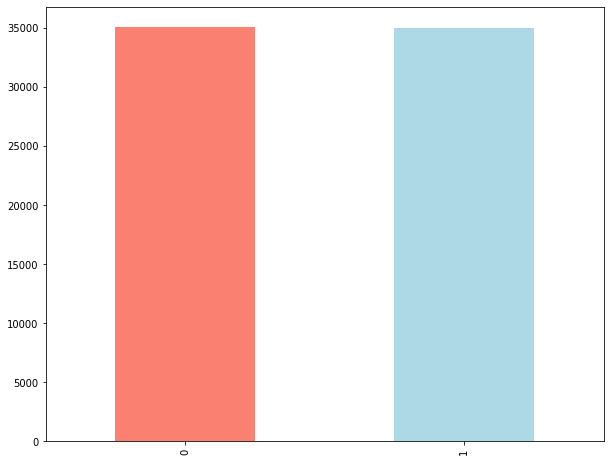

In [7]:
df["cardio"].value_counts().plot(kind="bar",color=["salmon","lightblue"],figsize=(10,8));

**Statistics Revealed from Bar Graph**

There are 70,000 records

1.   35,021 belong to class 0 [Disease Probability]
2.   34,979 belong to class 1 [No Disease Probability]

Its balance dataset with ratio of **50.03%** of **Class 1** and **49.97% of Class 0**

**In the Dataset the age is given in number of days it is converted into years**

In [8]:
df["age"] = (df["age"]/365).astype("int")

In [9]:
df.head(5)

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
# Changing Column of Pandas Data Column
df["weight"] = df["weight"].astype("int")

In [11]:
df.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,51,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,47,1,156,56,100,60,1,1,0,0,0,0


In [12]:
# Converting height from centimeter to meter so BMI can be calculated later
df['height'] = df['height']/100

In [13]:
df.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,1.68,62,110,80,1,1,0,0,1,0
1,55,1,1.56,85,140,90,3,1,0,0,1,1
2,51,1,1.65,64,130,70,3,1,0,0,0,1
3,48,2,1.69,82,150,100,1,1,0,0,1,1
4,47,1,1.56,56,100,60,1,1,0,0,0,0


### Features of Dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              70000 non-null  int64  
 1   gender           70000 non-null  int64  
 2   height           70000 non-null  float64
 3   weight           70000 non-null  int64  
 4   systolicbp_high  70000 non-null  int64  
 5   diastolicbp_low  70000 non-null  int64  
 6   cholesterol      70000 non-null  int64  
 7   gluc             70000 non-null  int64  
 8   smoke            70000 non-null  int64  
 9   alco             70000 non-null  int64  
 10  active           70000 non-null  int64  
 11  cardio           70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


### Statistical Description About Features of Dataset

In [15]:
df.describe()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,1.643592,74.204329,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,0.082101,14.395953,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,0.550000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,2.500000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Shape of Dataset

In [16]:
df.shape
originalLength = df.shape[0]

In [17]:
originalLength

70000

## **Data Cleaning/Preprocessing**

### **1. Missing Values**

In [18]:
missing_value_count = df.isnull().sum()

In [19]:
missing_value_count

age                0
gender             0
height             0
weight             0
systolicbp_high    0
diastolicbp_low    0
cholesterol        0
gluc               0
smoke              0
alco               0
active             0
cardio             0
dtype: int64

### **2. Duplicate Detection and Removal**



In [20]:
df_duplicated = df[df.duplicated()]

In [21]:
df_duplicated.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio
842,40,2,1.65,60,120,80,1,1,0,0,0,0
958,49,2,1.75,89,120,80,1,1,0,0,1,0
1855,58,1,1.65,78,120,80,1,1,0,0,1,1
1898,57,1,1.60,58,120,80,1,1,0,0,1,0
3904,42,2,1.69,65,120,80,1,1,0,0,1,0


In [22]:
duplicate_length = len(df_duplicated)
print(f'Duplicate Records in Dataset:{duplicate_length}')

Duplicate Records in Dataset:3213


In [23]:
# Remove the Duplicate Records
df = pd.DataFrame.drop_duplicates(df)

In [24]:
df.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,1.68,62,110,80,1,1,0,0,1,0
1,55,1,1.56,85,140,90,3,1,0,0,1,1
2,51,1,1.65,64,130,70,3,1,0,0,0,1
3,48,2,1.69,82,150,100,1,1,0,0,1,1
4,47,1,1.56,56,100,60,1,1,0,0,0,0


In [25]:
print(f'Original Length of Dataset:{originalLength}')
print(f'Length of Dataset after Duplicate records removed:{originalLength-duplicate_length}')
print(f'Duplicate Records removed:{duplicate_length}')

Original Length of Dataset:70000
Length of Dataset after Duplicate records removed:66787
Duplicate Records removed:3213


### **3. Outlier Detection and Removal**

#### **Technique:Percentile Method**

##### **Feature: Systolic Blood Pressure**

In [26]:
# Feature: Systolic Blood Pressure
df.systolicbp_high.unique()

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   200,    14,   123,    70,   161,   147,   115,
         137,   153,    11,   148,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   116,    10,   121,    16,   112,   159,
         113,   118,   155,   142,   131,   157,   136,   146,   138,
        -100,   909,   109,    85,   106,   129,    93,     7,    95,
         179,   156,   168,   132,   104,   103,   178,   175,   128,
         151,    15,   139, 11500,   127,    17,   108,   144,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

**Value such as 11020, 16020, 1202 -120, 14020 etc is outlier in the systolic blood pressure feature of dataset. It should be removed**

In [27]:
# Get Min Threshold based on 5 percentile value
min_threshold_sy = df["systolicbp_high"].quantile(0.05)
# Get Max Threshold based on 95 percentile value
max_threshold_sy = df["systolicbp_high"].quantile(0.95)

In [28]:
print(f'Minimum Threshold for Systolic Blood Pressure:{min_threshold_sy}')
print(f'Maximum Threshold for Systolic Blood Pressure:{max_threshold_sy}')
print(f'Value below {min_threshold_sy} and above {max_threshold_sy} are outliers')

Minimum Threshold for Systolic Blood Pressure:100.0
Maximum Threshold for Systolic Blood Pressure:160.0
Value below 100.0 and above 160.0 are outliers


In [29]:
df_sys = df[(df.systolicbp_high<=max_threshold_sy) & (df.systolicbp_high>=min_threshold_sy)]

In [30]:
df_sys.systolicbp_high.unique()

array([110, 140, 130, 150, 100, 120, 145, 135, 125, 160, 133, 122, 126,
       158, 123, 147, 115, 137, 153, 148, 105, 119, 141, 124, 117, 134,
       116, 121, 112, 159, 113, 118, 155, 142, 131, 157, 136, 146, 138,
       109, 106, 129, 156, 132, 104, 103, 128, 151, 139, 127, 108, 144,
       102, 143, 107, 149, 114, 101, 111, 154, 152])

In [31]:
sys_outlier_length = len(df_sys)

In [32]:
print(f'Length of Dataset After Duplicate Removed:{originalLength-duplicate_length}')
print(f'Length of Dataset after Systolic Blood Pressure Outlier Removal:{sys_outlier_length}')
print(f'Systolic BP Outlier Records removed:{(originalLength-duplicate_length)-sys_outlier_length}')

Length of Dataset After Duplicate Removed:66787
Length of Dataset after Systolic Blood Pressure Outlier Removal:63512
Systolic BP Outlier Records removed:3275


##### **Feature: Diastolic Blood Pressure**

In [33]:
# Feature: Diastolic Blood Pressure
df_sys.diastolicbp_low.unique()

array([   80,    90,    70,   100,    60,    85,    89,   110,    65,
          63,    79,  1100,  1000,   800,   120,    30,    84,  1033,
         150,    50,    91,    40,    78,    75,    86,    87,  1001,
          82,    95,    69,    74,    97,    81,    83,    73, 10000,
          77,    59,  8044,    92,  1044,   108,   115,    68,    61,
         102,    94,    66,    99,    76,    96,    93,    67,  9100,
          10,    88,   902,     8,   112,   104,    71,    72,  1200,
          98,    20,   802,   105,  8000,  1022,   850,   708,   101,
        9011,  1011,    64,     0,  1007,  7100,   109,    45,   709,
        8500,    58,  8099,  1077,   106,     7,    57,   103,   113,
        1125,   180,   121,  1008,    62,  8100,   710,  1110,  5700,
        8079,   130,  1111,   170,  1003,  1900,   809,   801,   140,
        1002,    53,     1,   810,     9,  7099,  9800,  8200,  1120,
         820,    55,   900,  6800,   160,   700,  1101,   910,  8077,
         901,   190,

**Value such as 9 , 7099, -70 901 is outlier in diastolic blood pressure.It should be removed**

In [34]:
# Get Min Threshold based on 5 percentile value
min_threshold_di = df_sys["diastolicbp_low"].quantile(0.05)
# Get Max Threshold based on 95 percentile value
max_threshold_di = df_sys["diastolicbp_low"].quantile(0.95)

In [35]:
print(f'Minimum Threshold for Systolic Blood Pressure:{min_threshold_di}')
print(f'Maximum Threshold for Systolic Blood Pressure:{max_threshold_di}')
print(f'Value below {min_threshold_di} and above {max_threshold_di} are outliers')

Minimum Threshold for Systolic Blood Pressure:70.0
Maximum Threshold for Systolic Blood Pressure:100.0
Value below 70.0 and above 100.0 are outliers


In [36]:
df_dys = df_sys[(df_sys.diastolicbp_low<=max_threshold_di) & (df_sys.diastolicbp_low>=min_threshold_di)]

In [37]:
df_dys.diastolicbp_low.unique()

array([ 80,  90,  70, 100,  85,  89,  79,  84,  91,  78,  75,  86,  87,
        82,  95,  74,  97,  81,  83,  73,  77,  92,  94,  99,  76,  96,
        93,  88,  71,  72,  98])

In [38]:
dy_outlier_length = len(df_dys)

In [39]:
print(f'Length of Dataset After Systolic Blood Pressure Outlier Removed:{sys_outlier_length}')
print(f'Length of Dataset after Diastolic Blood Pressure Outlier Removal:{dy_outlier_length}')
print(f'Diastolic Blood Pressure Outlier Records removed:{(sys_outlier_length)-dy_outlier_length}')

Length of Dataset After Systolic Blood Pressure Outlier Removed:63512
Length of Dataset after Diastolic Blood Pressure Outlier Removal:60275
Diastolic Blood Pressure Outlier Records removed:3237


In [40]:
df_dys.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,1.68,62,110,80,1,1,0,0,1,0
1,55,1,1.56,85,140,90,3,1,0,0,1,1
2,51,1,1.65,64,130,70,3,1,0,0,0,1
3,48,2,1.69,82,150,100,1,1,0,0,1,1
5,60,1,1.51,67,120,80,2,2,0,0,0,0


In [41]:
len(df_dys)

60275

In [42]:
df_dys.shape

(60275, 12)

In [43]:
df_dys["cardio"].value_counts()

1    30719
0    29556
Name: cardio, dtype: int64

##### **Feature: Weight**

In [44]:
df_dys.weight.unique()

array([ 62,  85,  64,  82,  67,  93,  95,  71,  80,  60,  78, 112,  75,
        52,  68,  56,  83,  69,  90,  65,  59,  66,  74, 105,  73,  55,
        70,  72, 107,  84,  77,  79,  58, 115,  97,  76,  53,  57,  49,
       110,  94,  92,  87, 103,  88, 100,  61,  48,  54,  51,  63,  47,
        50,  91, 104,  98, 108,  81,  89, 101,  99,  86, 142,  96,  44,
       169, 116, 200, 120, 117, 125, 106, 114,  45, 113, 129, 124, 123,
       111, 102, 109,  46, 139, 138, 131,  43, 150, 134, 121, 141, 119,
       126, 177, 165,  40, 118, 132, 130, 159, 140,  30, 127, 122, 149,
       180,  41, 128,  37,  42, 166, 161, 136, 170, 135,  38, 145, 168,
       133, 153,  34, 156,  35,  31, 152, 162, 178,  32, 158,  23, 144,
       148, 164,  22, 137,  39,  11,  36,  28, 155, 171, 160, 143,  21,
        29, 183, 172, 154, 147])

In [45]:
# Get Max Threshold based on 95 percentile value
# Get Min Threshold based on 5 percentile value
#max_thres_weight = data_percent_outlier_removed["weight"].quantile(0.95)
#min_thres_weight = data_percent_outlier_removed["weight"].quantile(0.05)
min_thres_weight = 50
max_thres_weight = 120

In [46]:
print(f'Minimum Threshold for Weight:{min_thres_weight}')
print(f'Maximum Threshold for Weight:{max_thres_weight}')
print(f'Value below {min_thres_weight} and above {max_thres_weight} are outliers')

Minimum Threshold for Weight:50
Maximum Threshold for Weight:120
Value below 50 and above 120 are outliers


In [47]:
df_wei = df_dys[(df_dys.weight<=max_thres_weight) & (df_dys.weight>=min_thres_weight)]

In [48]:
weiLength = len(df_wei)

In [49]:
weiLength

59108

In [50]:
print(f'Length of Dataset After Diastolic Blood Pressure Outlier Removed:{dy_outlier_length}')
print(f'Length of Dataset After Weight Outlier Removal:{weiLength}')
print(f'Weight Outlier Records removed:{(dy_outlier_length)-weiLength}')

Length of Dataset After Diastolic Blood Pressure Outlier Removed:60275
Length of Dataset After Weight Outlier Removal:59108
Weight Outlier Records removed:1167


In [51]:
df_wei.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,1.68,62,110,80,1,1,0,0,1,0
1,55,1,1.56,85,140,90,3,1,0,0,1,1
2,51,1,1.65,64,130,70,3,1,0,0,0,1
3,48,2,1.69,82,150,100,1,1,0,0,1,1
5,60,1,1.51,67,120,80,2,2,0,0,0,0


In [52]:
len(df_wei)

59108

In [53]:
df_wei.shape

(59108, 12)

In [54]:
df_wei.cardio.value_counts()

1    30201
0    28907
Name: cardio, dtype: int64

##### **Feature: Height**

In [55]:
df_wei['height'].unique()

array([1.68, 1.56, 1.65, 1.69, 1.51, 1.57, 1.78, 1.58, 1.73, 1.81, 1.72,
       1.7 , 1.54, 1.62, 1.63, 1.53, 1.59, 1.66, 1.55, 1.6 , 1.75, 1.64,
       1.71, 1.52, 1.87, 1.48, 1.79, 1.8 , 1.88, 1.85, 1.67, 1.83, 1.74,
       1.76, 1.61, 1.84, 1.82, 0.76, 1.49, 1.42, 1.5 , 1.44, 1.47, 1.77,
       1.41, 1.95, 1.4 , 1.98, 1.86, 1.45, 1.46, 1.43, 1.96, 1.38, 1.94,
       1.9 , 1.34, 1.36, 1.  , 1.2 , 1.89, 1.37, 1.92, 2.5 , 1.17, 1.19,
       1.3 , 1.1 , 1.93, 1.91, 1.32, 0.71, 1.35, 0.67, 0.7 , 0.74, 1.33,
       2.07, 0.55, 0.64, 0.91, 0.6 , 1.09, 1.25, 0.72, 1.97, 0.65, 1.05,
       1.08, 1.11, 0.68, 0.75, 1.39, 1.13, 1.31, 0.57])

In [56]:
df_wei['cardio'].value_counts()

1    30201
0    28907
Name: cardio, dtype: int64

In [57]:
# Get Max Threshold based on 95 percentile value
# Get Min Threshold based on 5 percentile value
max_thres_height = df_wei["height"].quantile(0.95)
min_thres_height = df_wei["height"].quantile(0.05)

In [58]:
print(f'Minimum Threshold for height:{min_thres_height}')
print(f'Maximum Threshold for height:{max_thres_height}')
print(f'Value below {min_thres_height} and above {max_thres_height} are outliers')

Minimum Threshold for height:1.52
Maximum Threshold for height:1.7799999999999998
Value below 1.52 and above 1.7799999999999998 are outliers


In [59]:
df_wei = df_wei[(df_wei.height<=max_thres_height) & (df_wei.height>=min_thres_height)]

In [60]:
heilength = len(df_wei)

In [61]:
heilength

53077

In [62]:
print(f'Length of Dataset After Weight Outlier Removed:{weiLength}')
print(f'Length of Dataset After Height Outlier Removal:{heilength}')
print(f'Height Outlier Records removed:{weiLength-heilength}')

Length of Dataset After Weight Outlier Removed:59108
Length of Dataset After Height Outlier Removal:53077
Height Outlier Records removed:6031


In [63]:
print(f'Length of Dataset:{originalLength}')
fDiff = originalLength - sys_outlier_length
sDiff = sys_outlier_length - dy_outlier_length
tDiff = dy_outlier_length - weiLength
foDiff = weiLength - heilength
print(f'Length of Dataset after Outlier Removal:{originalLength-(fDiff+sDiff+tDiff)}')

Length of Dataset:70000
Length of Dataset after Outlier Removal:59108


In [64]:
dataframe = df_wei

In [65]:
dataframe.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,1.68,62,110,80,1,1,0,0,1,0
1,55,1,1.56,85,140,90,3,1,0,0,1,1
2,51,1,1.65,64,130,70,3,1,0,0,0,1
3,48,2,1.69,82,150,100,1,1,0,0,1,1
6,60,1,1.57,93,130,80,3,1,0,0,1,0


In [66]:
dataframe.cardio.value_counts()

1    27076
0    26001
Name: cardio, dtype: int64

In [67]:
dataframe.shape

(53077, 12)

####  **Visualization of Features: Percentile**

In [68]:
dataframe.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,1.68,62,110,80,1,1,0,0,1,0
1,55,1,1.56,85,140,90,3,1,0,0,1,1
2,51,1,1.65,64,130,70,3,1,0,0,0,1
3,48,2,1.69,82,150,100,1,1,0,0,1,1
6,60,1,1.57,93,130,80,3,1,0,0,1,0


##### **Feature: Age**

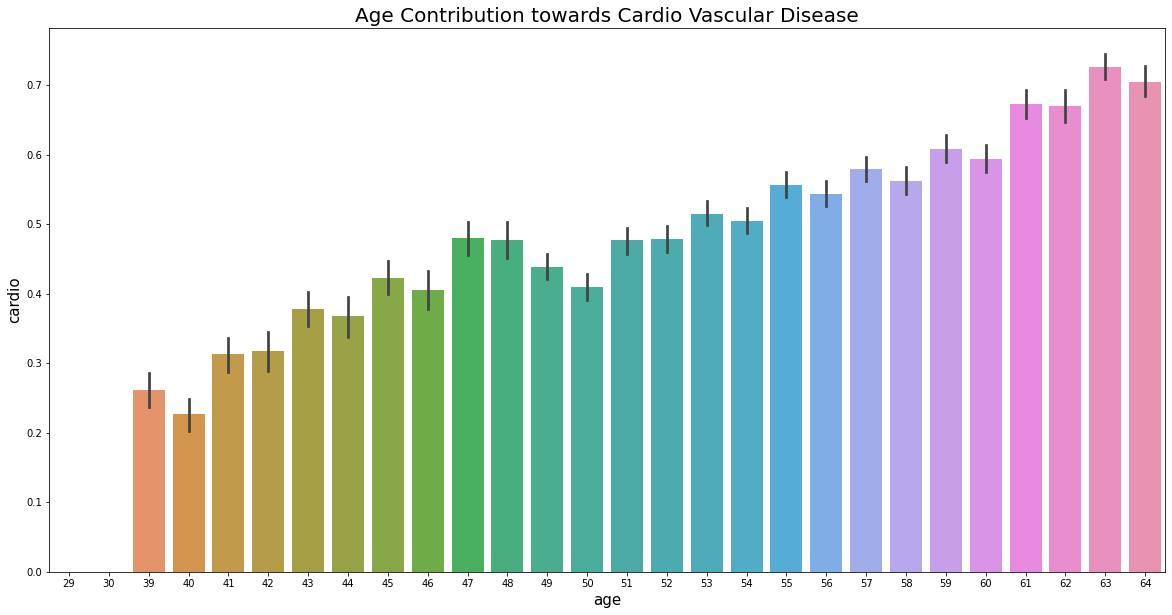

In [69]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Age Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("age",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "age", y = "cardio", ax=ax, data=dataframe);

##### **Feature: Weight**

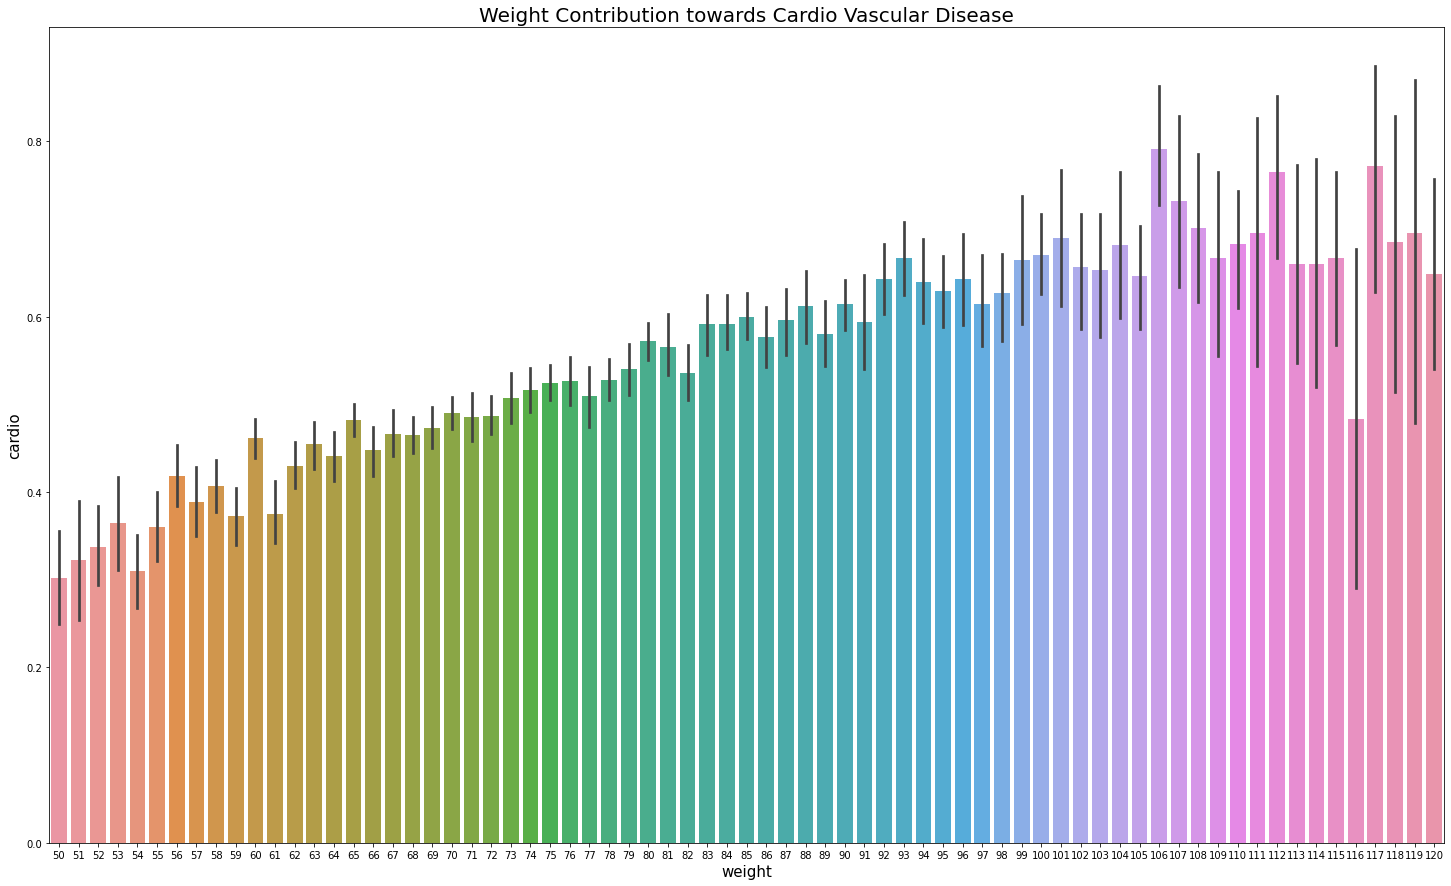

In [70]:
fig_dims = (25,15)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Weight Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("weight",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "weight", y = "cardio", ax=ax, data=dataframe);

##### **Feature: Height**

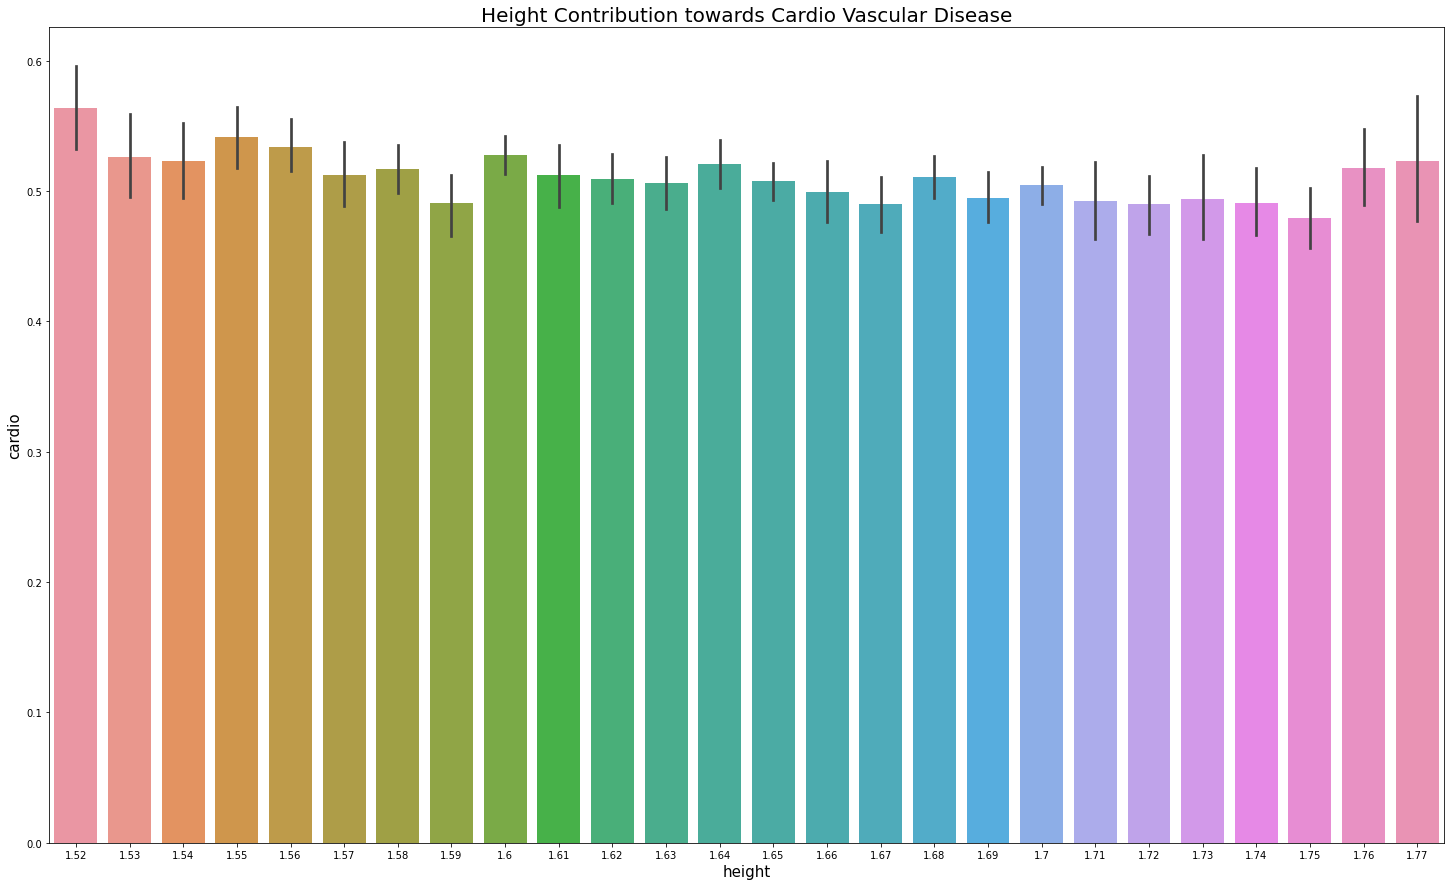

In [71]:
fig_dims = (25,15)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Height Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("height",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "height", y = "cardio", ax=ax, data=dataframe);

##### **Feature: Systolic Blood Pressure**

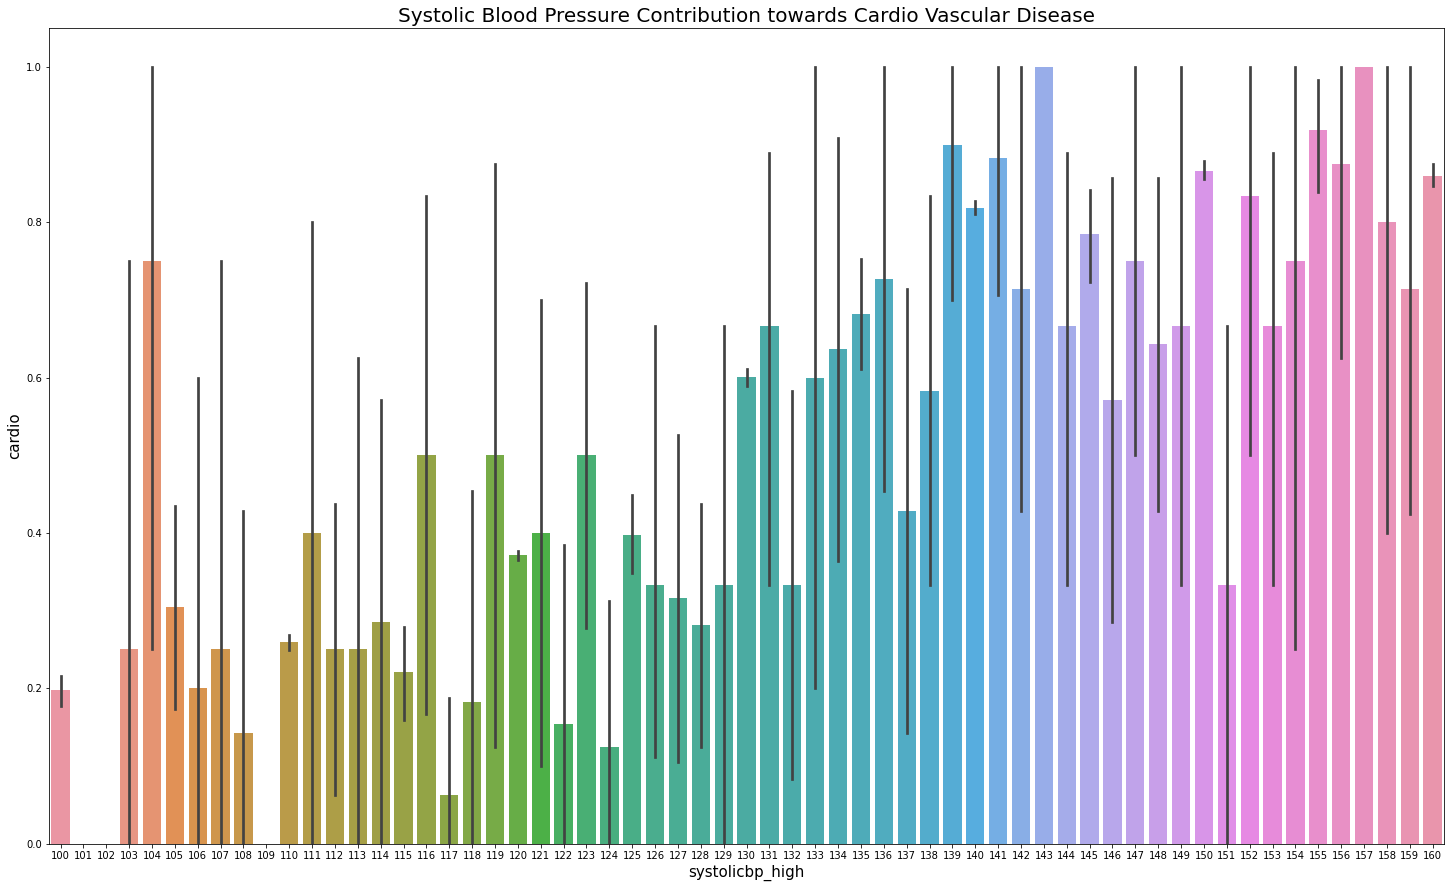

In [72]:
fig_dims = (25, 15)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Systolic Blood Pressure Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("systolicbp",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "systolicbp_high", y = "cardio", ax=ax, data=dataframe);

##### **Feature: Diastolic Blood Pressure**

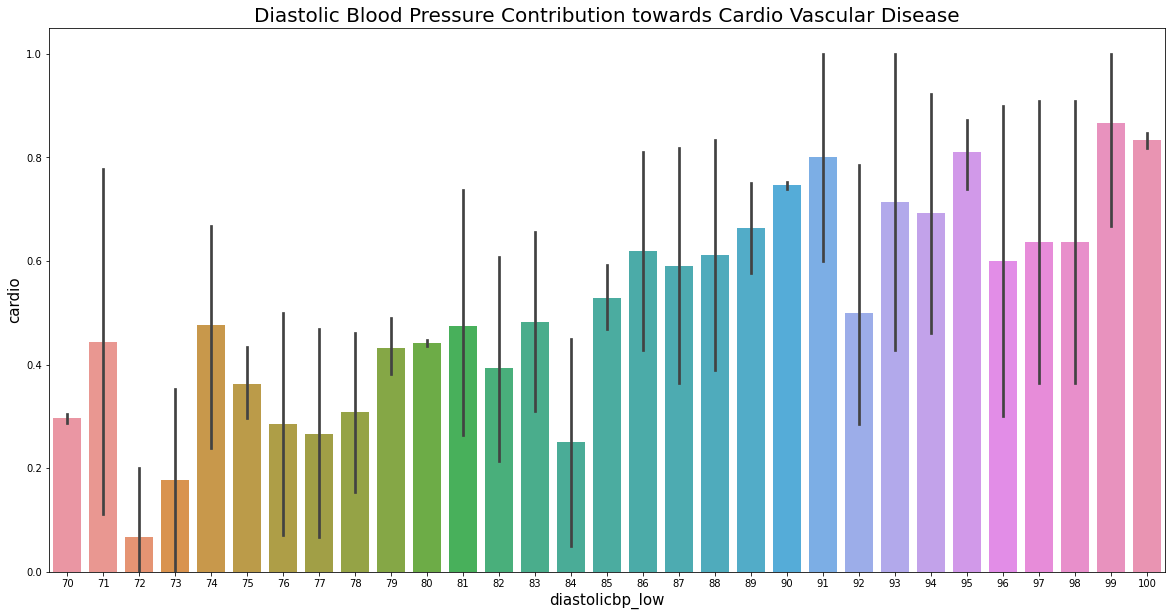

In [73]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Diastolic Blood Pressure Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("diastolic_bp",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "diastolicbp_low", y = "cardio", ax=ax, data=dataframe);

##### **Feature: Cholesterol**

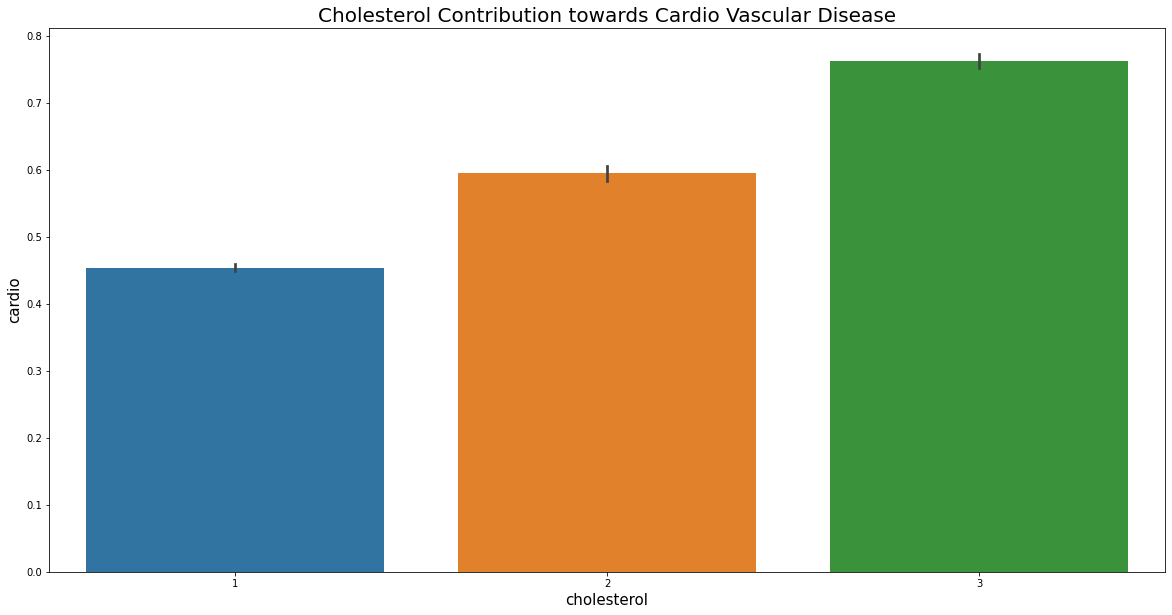

In [74]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Cholesterol Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("cholesterol",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "cholesterol", y = "cardio", ax=ax, data=dataframe);

##### **Feature: Glucose**

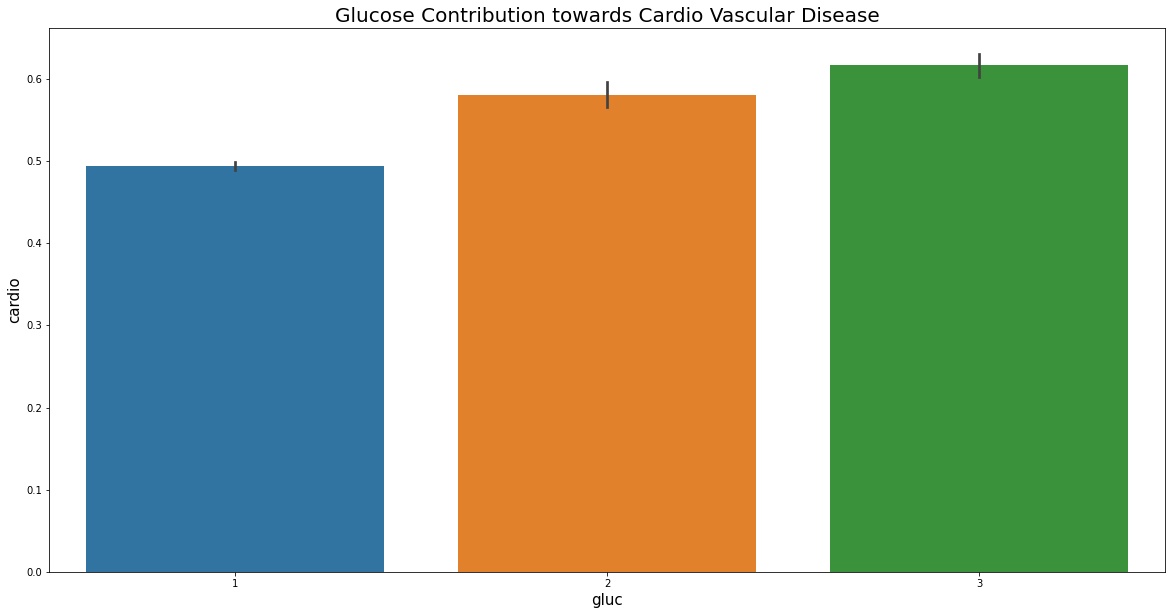

In [75]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Glucose Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("gluc",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "gluc", y = "cardio", ax=ax, data=dataframe);

##### **Feature: Age**

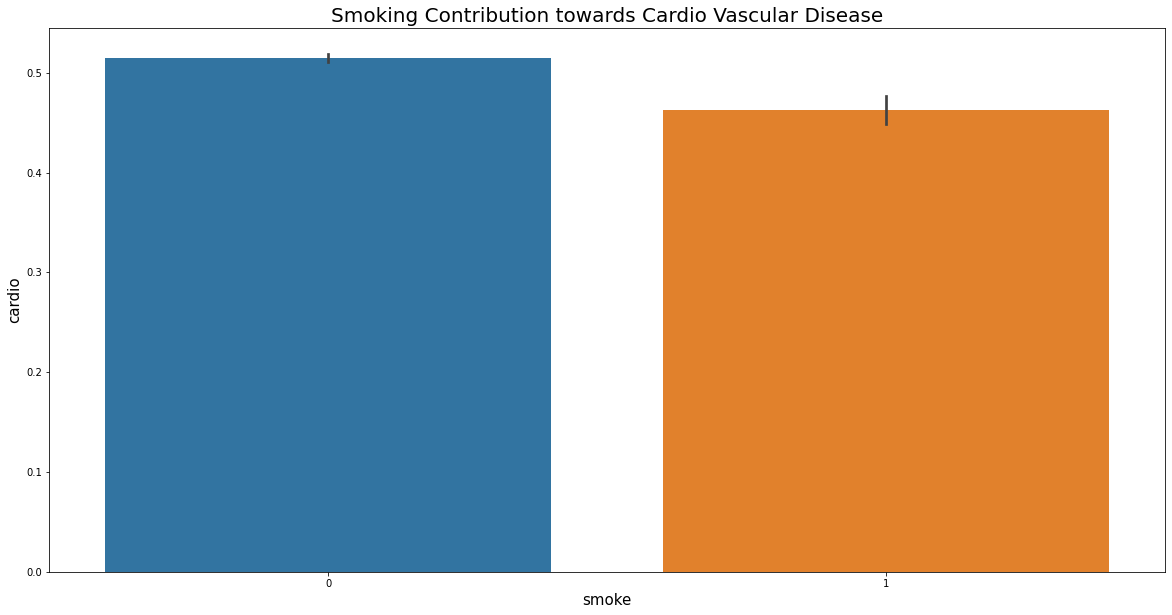

In [76]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Smoking Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("smoke",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "smoke", y = "cardio", ax=ax, data=dataframe);

##### **Feature: Alcohol**

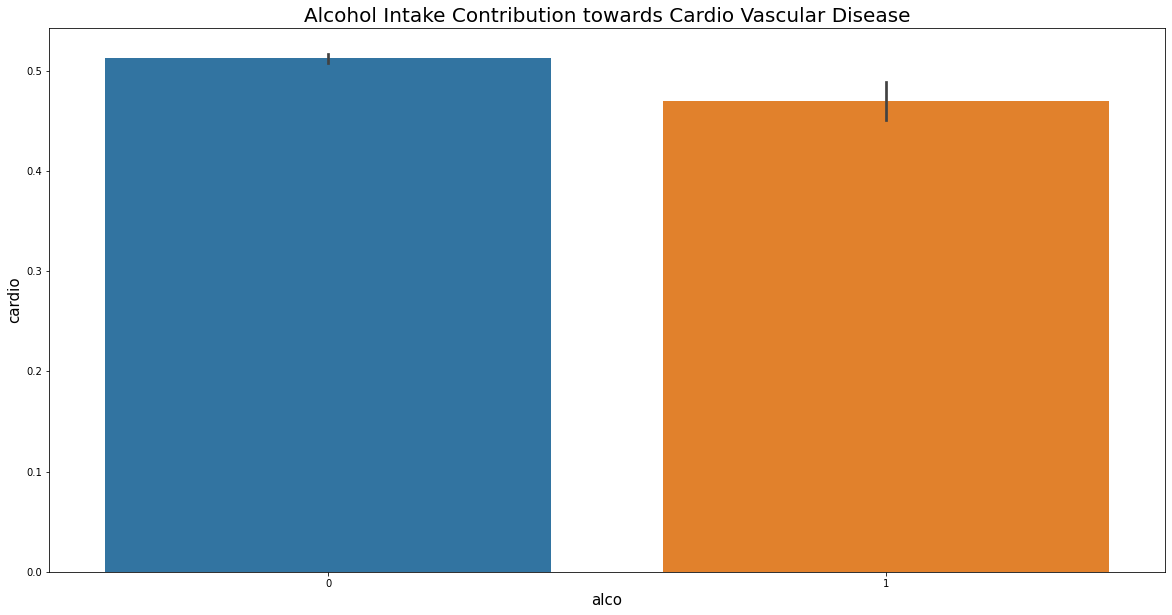

In [77]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Alcohol Intake Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("alco",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "alco", y = "cardio", ax=ax, data=dataframe);

##### **Feature: Active Excercise**

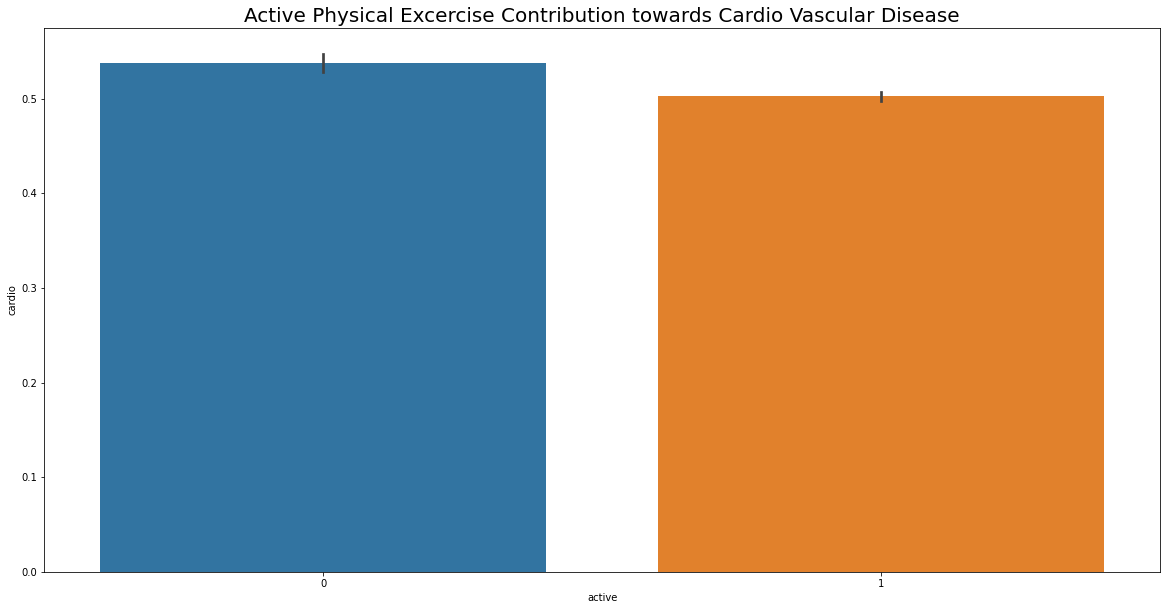

In [78]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Active Physical Excercise Contribution towards Cardio Vascular Disease",fontsize=20)
sns.barplot(x = "active", y = "cardio", ax=ax, data=dataframe);

#### **Technique:Domain Knowledge**

We have received range of systolic and diastolic pressure from homoepathy doctor

1. Systolic : 60 - 280
2. Diastolic : 50 - 150

##### **Feature: Systolic Blood Pressure**

In [79]:
df.systolicbp_high.unique()

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   200,    14,   123,    70,   161,   147,   115,
         137,   153,    11,   148,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   116,    10,   121,    16,   112,   159,
         113,   118,   155,   142,   131,   157,   136,   146,   138,
        -100,   909,   109,    85,   106,   129,    93,     7,    95,
         179,   156,   168,   132,   104,   103,   178,   175,   128,
         151,    15,   139, 11500,   127,    17,   108,   144,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

In [80]:
orLength = len(df)

**Value such as 11020, 16020, 1202 -120, 14020 etc is outlier in the systolic blood pressure feature of dataset. It should be removed**

In [81]:
# Setting Max and Min Threshold but now according to domain knowledge we have acquired
minimum = 60
maximum = 280

In [82]:
print(f'Minimum Threshold for Systolic Blood Pressure:{minimum}')
print(f'Maximum Threshold for Systolic Blood Pressure:{maximum}')
print(f'Value below {minimum} and above {maximum} are outliers')

Minimum Threshold for Systolic Blood Pressure:60
Maximum Threshold for Systolic Blood Pressure:280
Value below 60 and above 280 are outliers


In [83]:
# Remove the Outlier
data = df[(df.systolicbp_high<=maximum) & (df.systolicbp_high>=minimum)]

In [84]:
data.systolicbp_high.unique()

array([110, 140, 130, 150, 100, 120, 145, 170, 135, 125,  90, 180, 160,
       133, 190,  80, 122, 169, 126, 158, 200, 123,  70, 161, 147, 115,
       137, 153, 148, 105, 220, 119, 141, 165, 164, 124, 172, 162, 117,
       134, 166, 210, 176, 116, 121, 112, 159, 113, 118, 155, 142, 131,
       157, 136, 146, 138, 109,  85, 106, 129,  93,  95, 179, 156, 168,
       132, 104, 103, 178, 175, 128, 151, 139, 127, 108, 144, 102, 143,
       107, 184, 149, 167, 114, 101,  60, 181, 171, 202, 111, 188, 185,
       163, 173, 154, 177, 174, 240, 191, 197, 152,  96, 199, 193,  99,
       196, 230, 207, 215,  97, 195, 187])

In [85]:
sys_length = len(data)

In [86]:
print(f'Length of Dataset After Duplicate Removed:{orLength}')
print(f'Length of Dataset after Systolic Blood Pressure Outlier Removal:{sys_length}')
print(f'Systolic Blood Pressure Outlier Records removed:{(orLength - sys_length)}')

Length of Dataset After Duplicate Removed:66787
Length of Dataset after Systolic Blood Pressure Outlier Removal:66561
Systolic Blood Pressure Outlier Records removed:226


In [87]:
data.systolicbp_high.unique()

array([110, 140, 130, 150, 100, 120, 145, 170, 135, 125,  90, 180, 160,
       133, 190,  80, 122, 169, 126, 158, 200, 123,  70, 161, 147, 115,
       137, 153, 148, 105, 220, 119, 141, 165, 164, 124, 172, 162, 117,
       134, 166, 210, 176, 116, 121, 112, 159, 113, 118, 155, 142, 131,
       157, 136, 146, 138, 109,  85, 106, 129,  93,  95, 179, 156, 168,
       132, 104, 103, 178, 175, 128, 151, 139, 127, 108, 144, 102, 143,
       107, 184, 149, 167, 114, 101,  60, 181, 171, 202, 111, 188, 185,
       163, 173, 154, 177, 174, 240, 191, 197, 152,  96, 199, 193,  99,
       196, 230, 207, 215,  97, 195, 187])

##### **Feature: Diastolic Blood Pressure**

**Now lets check outlier in diastolicbp_low as many of outlier is already removed by systolic outlier**

In [88]:
data.diastolicbp_low.unique() 

array([   80,    90,    70,   100,    60,    85,    89,   110,    65,
          63,    79,  1100,  1000,   800,   120,    50,    30,   109,
          84,  1033,   150,    91,    40,    73,    78,    75,    86,
          87,  1001,    82,    95,    69,    74,    97,    81,  1200,
          83,   119,    93,   105, 10000,    99,    77,    59,  8044,
         140,    92,  1044,   108,   125,   115,    68,    61,   106,
         102,    94,    66,    52,   170,    76,   160,    62,    96,
         130,   113,    67,  9100,    10,    88,   902,     8,   112,
         104,    71,    72,  1008,    98,    20,   802,  8000,  1022,
         850,   708,    57,   101,  9011,  1011,    64,     0,  1007,
        1177,  7100,    45,   709,  8500,    58,  1110,  8099,  1088,
         126,  1077,  1120,     7,   103,  1125,   180,   121,  8100,
         710,  5700,  8079,  1111,  1003,     6,  1900,   809,   114,
         801,  1002,    53,   111,     1,   118,    56,   182,   810,
           9,  7099,

**Still there are some values such as 6 602 190 901**

In [89]:
minimum = 50
maximum = 150

In [90]:
print(f'Minimum Threshold for Diastolic Blood Pressure:{minimum}')
print(f'Maximum Threshold for Diastolic Blood Pressure:{maximum}')
print(f'Value below {minimum} and above {maximum} are outliers')

Minimum Threshold for Diastolic Blood Pressure:50
Maximum Threshold for Diastolic Blood Pressure:150
Value below 50 and above 150 are outliers


In [91]:
data = data[(data.diastolicbp_low<=maximum) & (data.diastolicbp_low>=minimum)]

In [92]:
dy_length = len(data)

In [93]:
dy_length

65524

In [94]:
print(f'Length of Dataset After Systolic Blood Pressure Outlier Removal:{sys_length}')
print(f'Length of Dataset after Diastolic Blood Pressure Outlier Removal:{dy_length}')
print(f'Diastolic Outlier Records removed:{(sys_length-dy_length)}')

Length of Dataset After Systolic Blood Pressure Outlier Removal:66561
Length of Dataset after Diastolic Blood Pressure Outlier Removal:65524
Diastolic Outlier Records removed:1037


In [95]:
data.diastolicbp_low.unique()

array([ 80,  90,  70, 100,  60,  85,  89, 110,  65,  63,  79, 120,  50,
       109,  84, 150,  91,  73,  78,  75,  86,  87,  82,  95,  69,  74,
        97,  81,  83, 119,  93, 105,  99,  77,  59, 140,  92, 108, 125,
       115,  68,  61, 106, 102,  94,  66,  52,  76,  62,  96, 130, 113,
        67,  88, 112, 104,  71,  72,  98,  57, 101,  64,  58, 126, 103,
       121, 114,  53, 111, 118,  56, 107,  55, 122, 135,  54])

In [96]:
data.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,1.68,62,110,80,1,1,0,0,1,0
1,55,1,1.56,85,140,90,3,1,0,0,1,1
2,51,1,1.65,64,130,70,3,1,0,0,0,1
3,48,2,1.69,82,150,100,1,1,0,0,1,1
4,47,1,1.56,56,100,60,1,1,0,0,0,0


In [97]:
data["cardio"].value_counts()

1    33222
0    32302
Name: cardio, dtype: int64

##### **Feature: Weight**

In [98]:
# No Outlier as range are within bound
data.weight.unique()

array([ 62,  85,  64,  82,  56,  67,  93,  95,  71,  68,  80,  60,  78,
       112,  75,  52,  83,  69,  90,  45,  65,  59,  66,  74, 105,  73,
        55,  70,  72,  63,  50, 107,  84,  77,  79,  76,  58, 115,  97,
        53,  57,  49, 110,  94,  92,  87, 103,  88,  99, 100,  61,  48,
        54,  51,  47,  91, 104,  81,  98, 108,  89, 101,  86, 142,  96,
        44,  41, 169, 116, 200, 120, 117, 125, 106, 114, 113, 129, 124,
        42, 123, 111, 102, 109,  46, 139, 150, 138, 131,  43, 134, 121,
        40, 141, 119, 126, 177, 165, 122, 118, 132, 130, 159, 140,  30,
       127, 149, 180, 128,  37, 166, 161, 136, 154, 170, 135, 146,  38,
       145,  39, 168, 133, 153,  34, 167, 156,  35,  31, 152, 163, 162,
       178,  32, 158,  23, 144, 148, 164,  22, 137,  36,  11,  28, 155,
        33, 160, 171, 143,  21,  29, 183, 172, 147])

In [99]:
# Get Max Threshold based on 95 percentile value
# Get Min Threshold based on 5 percentile value
# max_thres_weight = data_outlier_removed["weight"].quantile(0.95)
# min_thres_weight = data_outlier_removed["weight"].quantile(0.05)
# max_thres_weight, min_thres_weight
min_thres_weight = 50
max_thres_weight = 120

In [100]:
print(f'Minimum Threshold for Weight:{min_thres_weight}')
print(f'Maximum Threshold for Weight:{max_thres_weight}')
print(f'Value below {min_thres_weight} and above {max_thres_weight} are outliers')

Minimum Threshold for Weight:50
Maximum Threshold for Weight:120
Value below 50 and above 120 are outliers


In [101]:
data = data[(data.weight<=max_thres_weight) & (data.weight>=min_thres_weight)]

In [102]:
wLength = len(data)

In [103]:
wLength

64084

In [104]:
print(f'Length of Dataset after Diastolic Blood Pressure Outlier Removal:{dy_length}')
print(f'Length of Dataset After Weight Outlier Removal:{wLength}')
print(f'Weight Outlier Records removed:{(dy_length)-wLength}')

Length of Dataset after Diastolic Blood Pressure Outlier Removal:65524
Length of Dataset After Weight Outlier Removal:64084
Weight Outlier Records removed:1440


In [105]:
data.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,1.68,62,110,80,1,1,0,0,1,0
1,55,1,1.56,85,140,90,3,1,0,0,1,1
2,51,1,1.65,64,130,70,3,1,0,0,0,1
3,48,2,1.69,82,150,100,1,1,0,0,1,1
4,47,1,1.56,56,100,60,1,1,0,0,0,0


In [106]:
len(data)

64084

In [107]:
data.shape

(64084, 12)

In [108]:
data.cardio.value_counts()

1    32617
0    31467
Name: cardio, dtype: int64

##### **Feature: Height**

In [109]:
data.height.unique()

array([1.68, 1.56, 1.65, 1.69, 1.51, 1.57, 1.78, 1.58, 1.64, 1.73, 1.81,
       1.72, 1.7 , 1.54, 1.62, 1.63, 1.53, 1.59, 1.66, 1.55, 1.6 , 1.75,
       1.71, 1.52, 1.87, 1.48, 1.79, 1.8 , 1.88, 1.85, 1.67, 1.83, 1.74,
       1.76, 1.61, 1.84, 1.77, 1.82, 0.76, 1.49, 1.42, 1.5 , 1.44, 1.47,
       1.41, 1.95, 1.4 , 1.98, 1.86, 1.45, 1.46, 1.43, 1.96, 1.38, 1.94,
       1.9 , 1.34, 1.36, 1.  , 1.2 , 1.89, 1.37, 1.92, 2.5 , 1.17, 1.19,
       1.3 , 1.1 , 1.93, 1.91, 1.32, 0.71, 1.35, 0.67, 0.7 , 1.39, 0.74,
       1.33, 2.07, 0.68, 0.55, 0.64, 0.91, 0.6 , 1.09, 1.25, 0.72, 1.97,
       0.65, 1.05, 1.08, 1.11, 0.75, 1.13, 0.96, 1.31, 0.59, 0.99, 0.57])

In [110]:
# Get Max Threshold based on 95 percentile value
# Get Min Threshold based on 5 percentile value
max_thres_height = data["height"].quantile(0.95)
min_thres_height = data["height"].quantile(0.05)

In [111]:
print(f'Minimum Threshold for Weight:{min_thres_height}')
print(f'Maximum Threshold for Weight:{max_thres_height}')
print(f'Value below {min_thres_height} and above {max_thres_height} are outliers')

Minimum Threshold for Weight:1.52
Maximum Threshold for Weight:1.78
Value below 1.52 and above 1.78 are outliers


In [112]:
data = data[(data.height<=max_thres_height) & (data.height>=min_thres_height)]

In [113]:
hLength = len(data)

In [114]:
hLength

58700

In [115]:
print(f'Length of Dataset After Weight Outlier Removal:{wLength}')
print(f'Length of Dataset After Height Outlier Removal:{hLength}')
print(f'Height Outlier Records removed:{(wLength)-hLength}')

Length of Dataset After Weight Outlier Removal:64084
Length of Dataset After Height Outlier Removal:58700
Height Outlier Records removed:5384


In [116]:
data.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,1.68,62,110,80,1,1,0,0,1,0
1,55,1,1.56,85,140,90,3,1,0,0,1,1
2,51,1,1.65,64,130,70,3,1,0,0,0,1
3,48,2,1.69,82,150,100,1,1,0,0,1,1
4,47,1,1.56,56,100,60,1,1,0,0,0,0


In [117]:
len(data)

58700

In [118]:
data.shape

(58700, 12)

In [119]:
data.cardio.value_counts()

1    29814
0    28886
Name: cardio, dtype: int64

In [120]:
print(f'Length of Dataset:{originalLength}')
fDiff = originalLength - sys_length
sDiff = sys_length - dy_length
tDiff = dy_length - wLength
foDiff = wLength-hLength
print(f'Length of Dataset after Outlier Removal:{originalLength-(fDiff+sDiff+tDiff+foDiff)}')

Length of Dataset:70000
Length of Dataset after Outlier Removal:58700


####  **Visualization of Features: Domain Knowledge**

##### **Feature: Age**

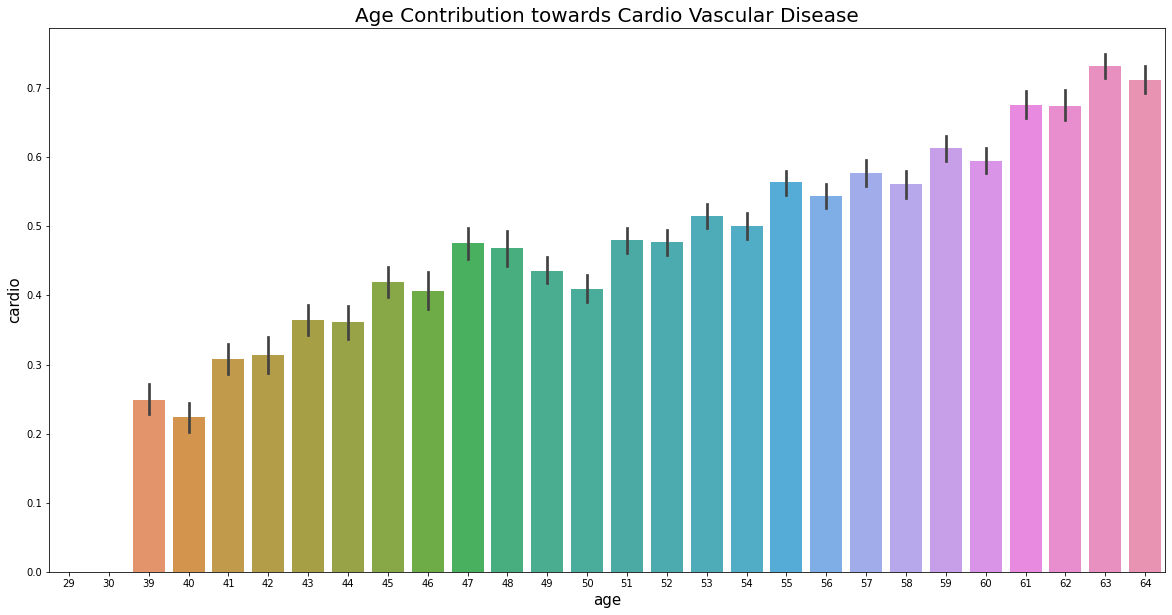

In [121]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Age Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("age",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "age", y = "cardio", ax=ax, data=data);

##### **Feature: Weight**

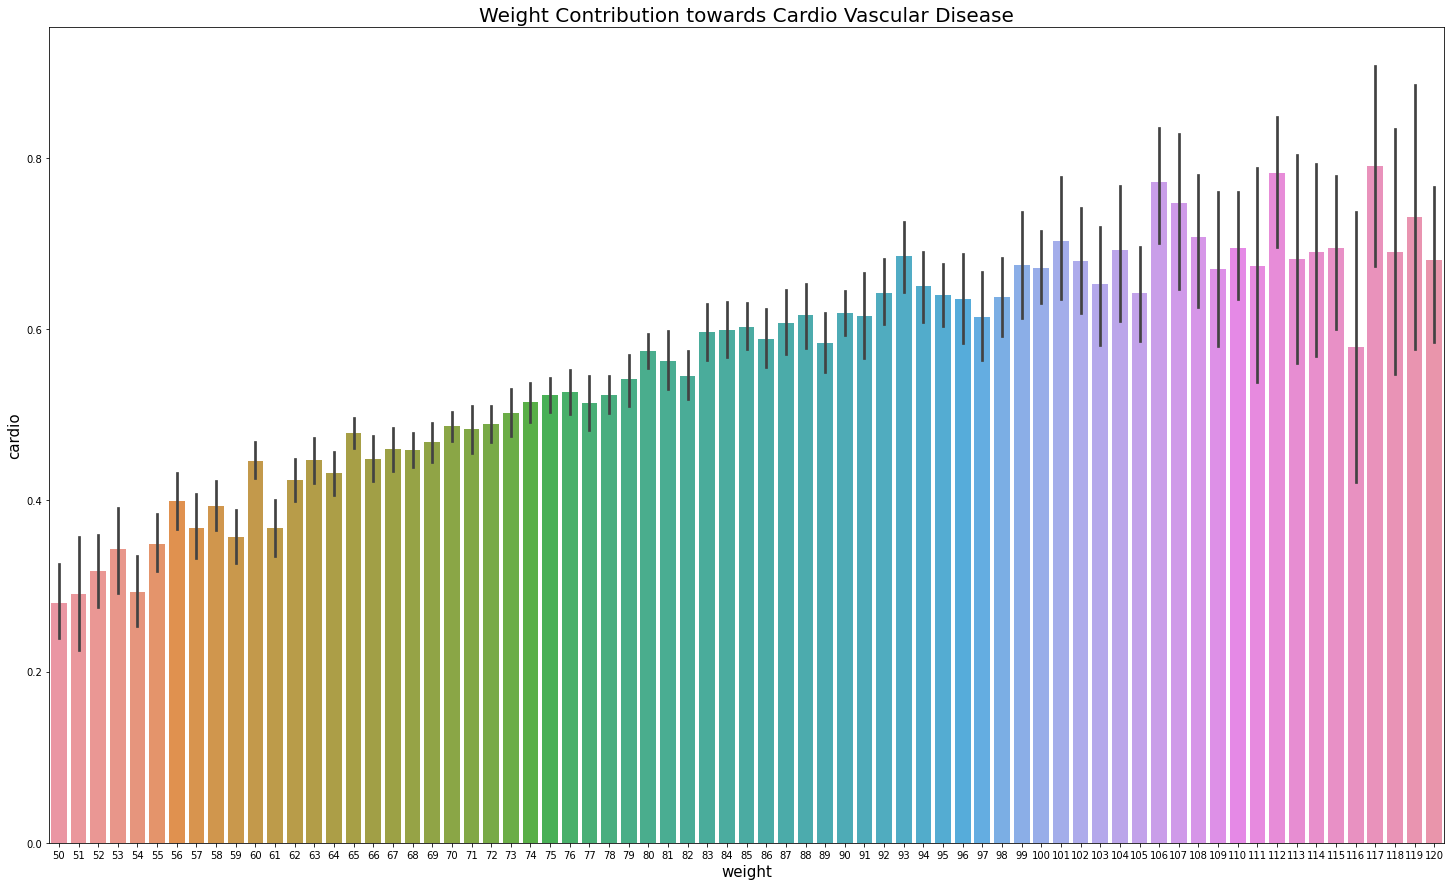

In [122]:
fig_dims = (25, 15)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Weight Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("weight",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "weight", y = "cardio", ax=ax, data=data);

##### **Feature: Height**

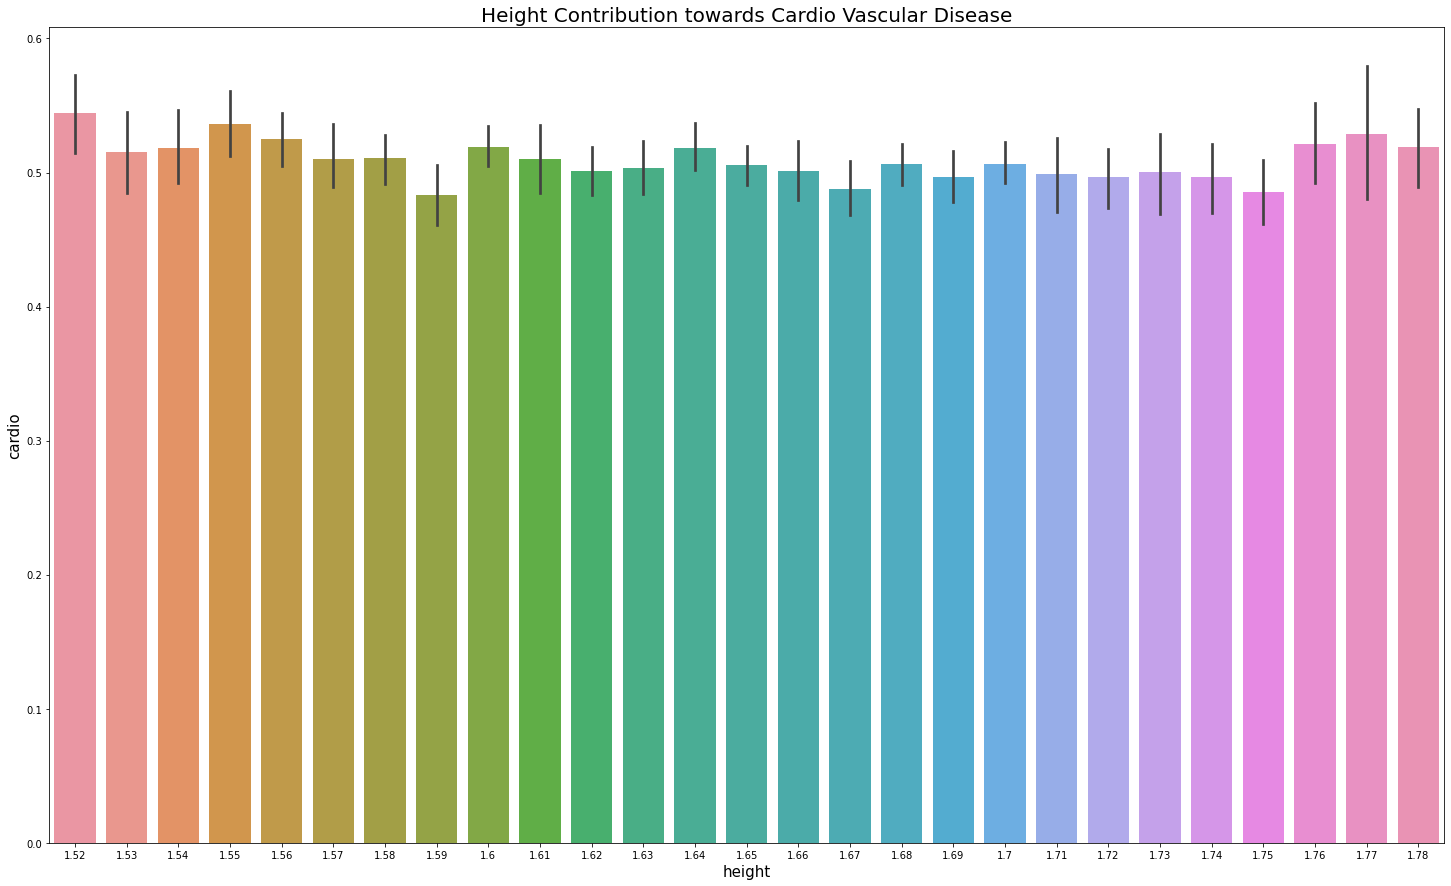

In [123]:
fig_dims = (25, 15)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Height Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("height",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "height", y = "cardio", ax=ax, data=data);

##### **Feature: Systolic Blood Pressure**

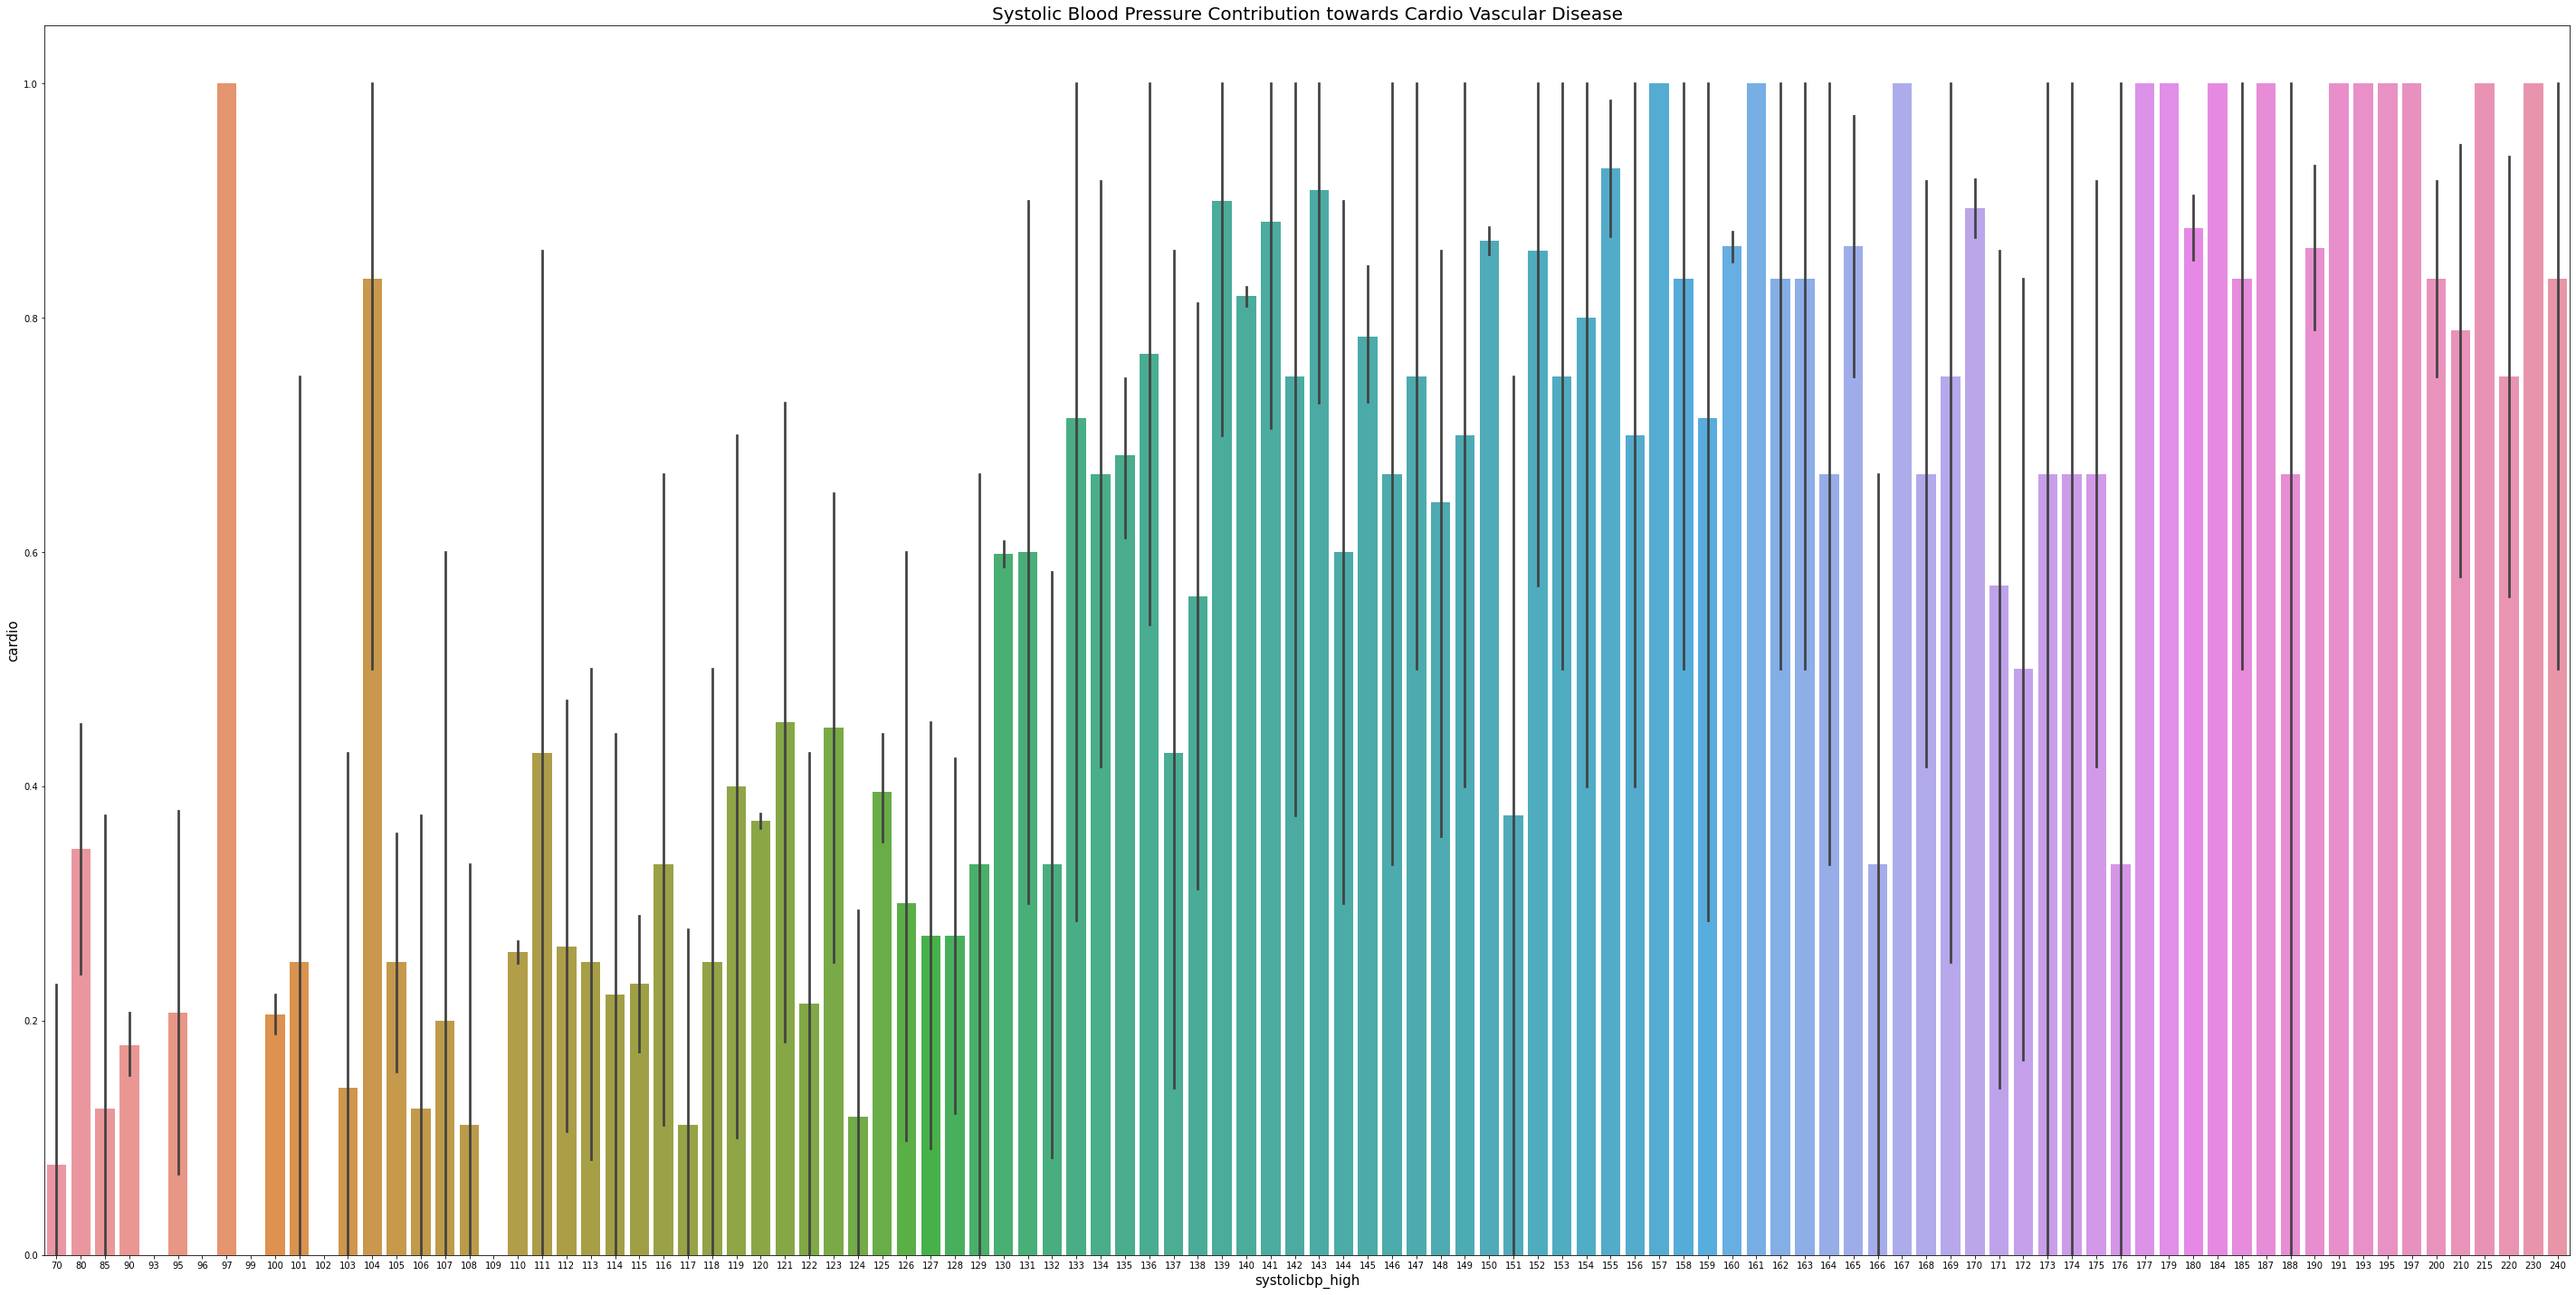

In [124]:
fig_dims = (50, 25)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Systolic Blood Pressure Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("systolicbp",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "systolicbp_high", y = "cardio", ax=ax, data=data);

##### **Feature: Diastolic Blood Pressure**

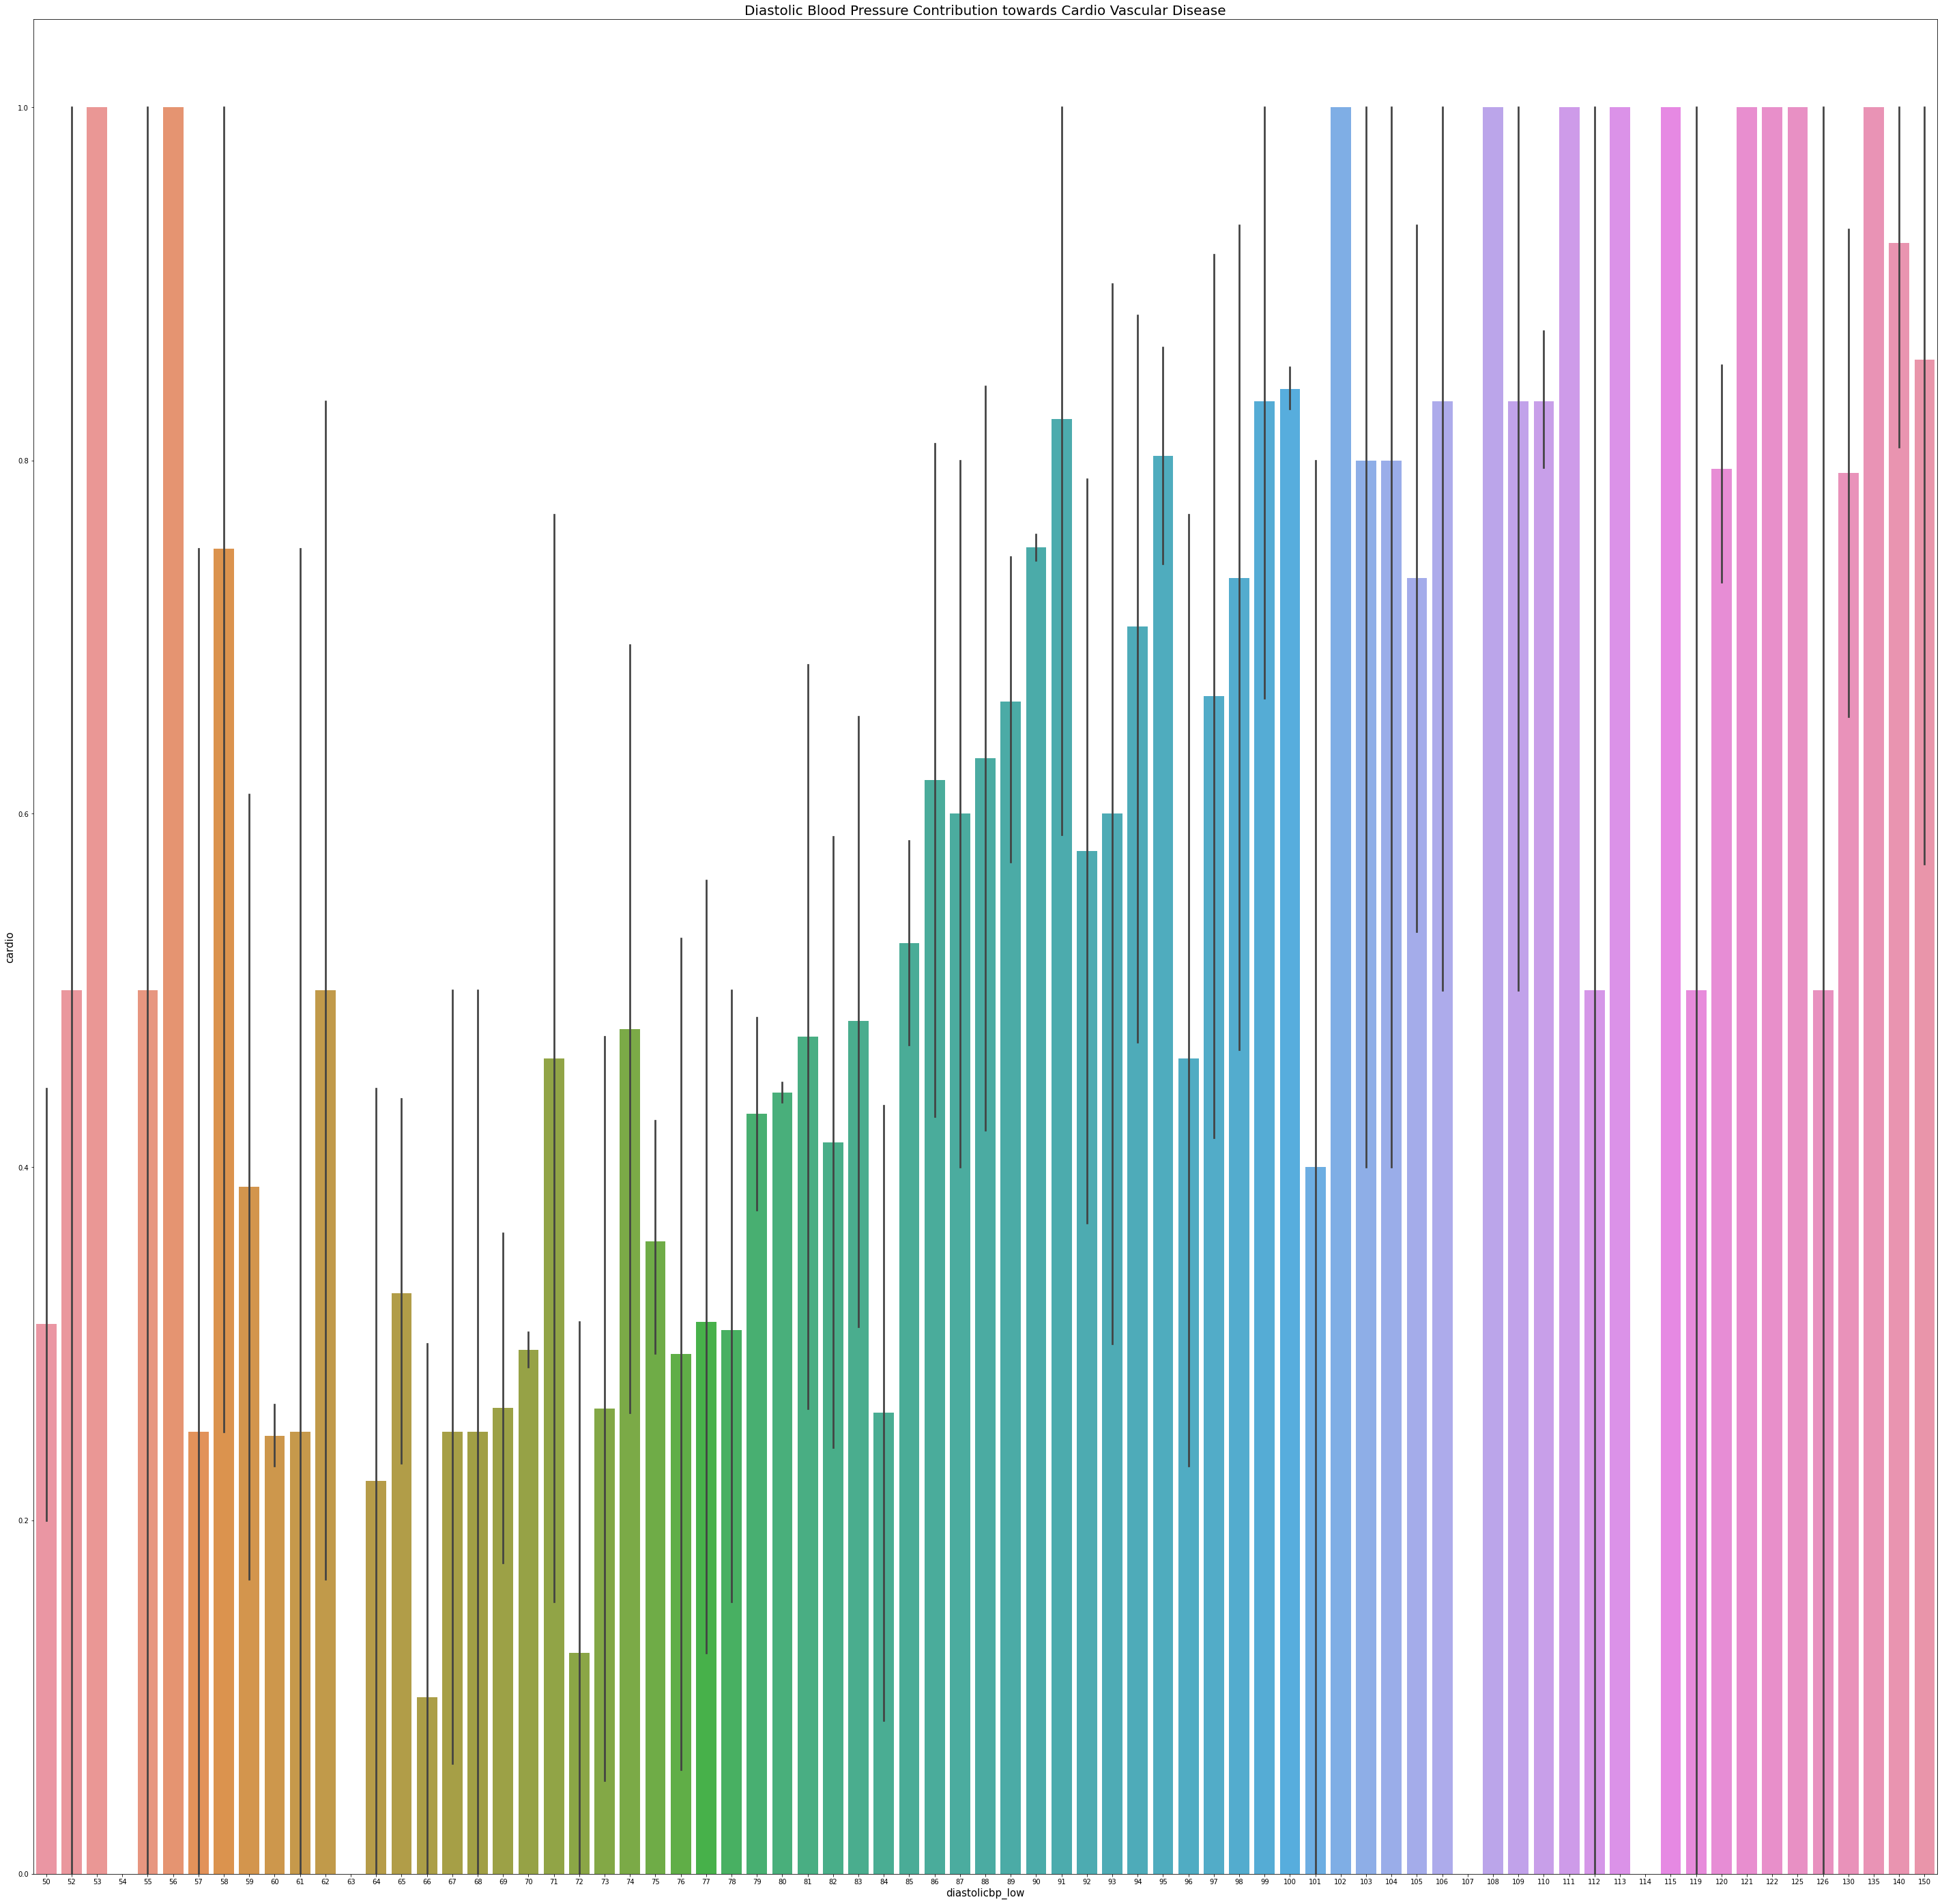

In [125]:
fig_dims = (50, 50)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Diastolic Blood Pressure Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("diastolicbp",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "diastolicbp_low", y = "cardio", ax=ax, data=data);

##### **Feature: Cholesterol**

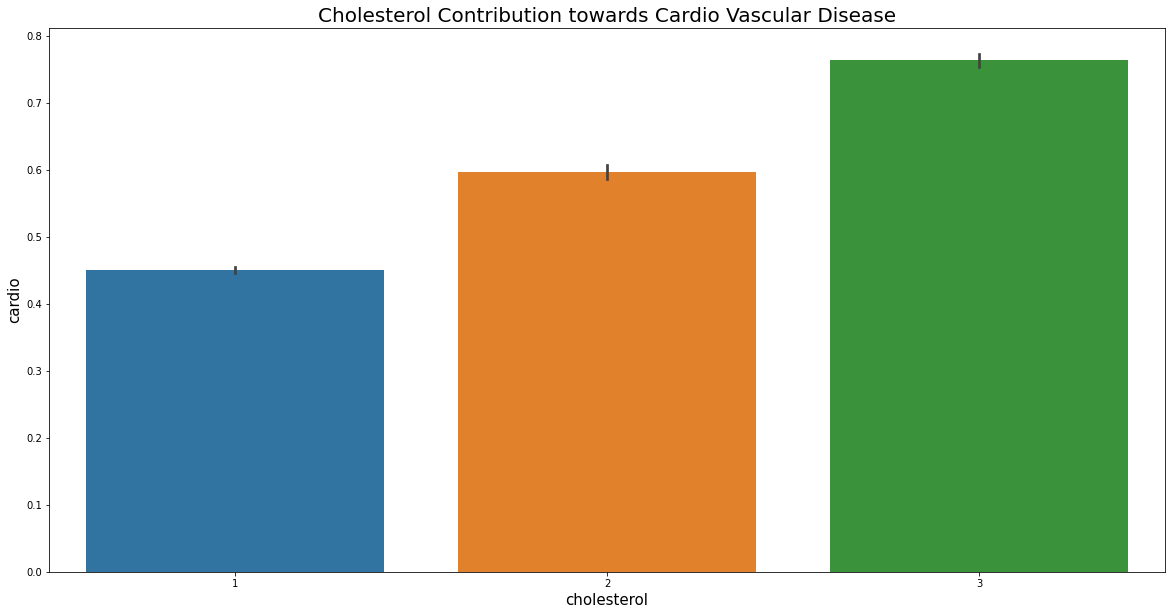

In [126]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Cholesterol Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("cholesterol",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "cholesterol", y = "cardio", ax=ax, data=data);

##### **Feature: Glucose**

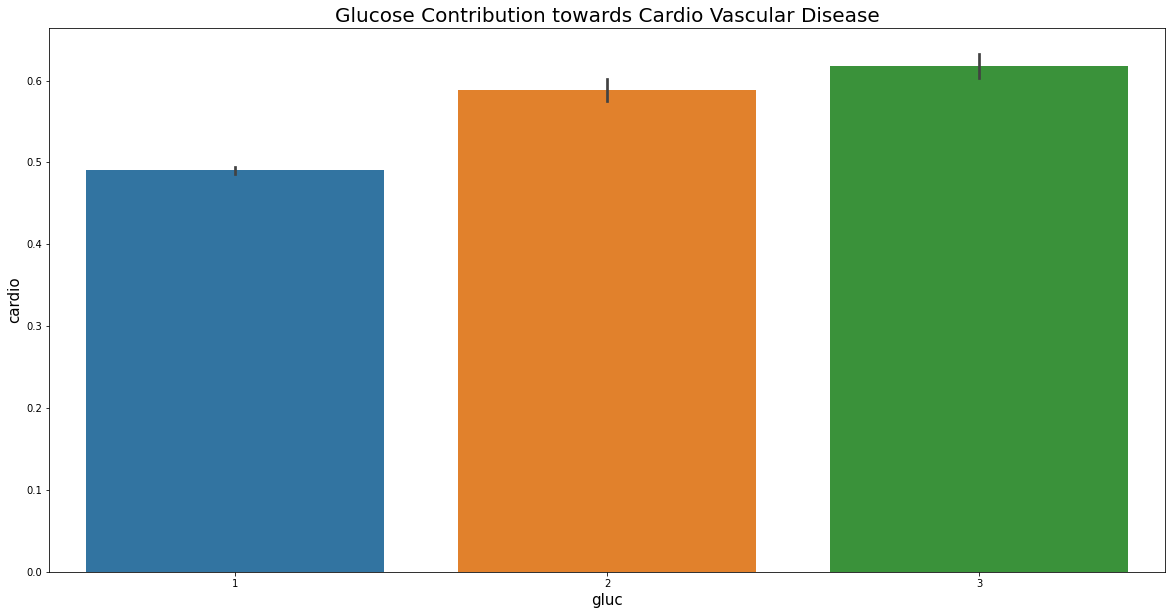

In [127]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Glucose Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("gluc",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "gluc", y = "cardio", ax=ax, data=data);

##### **Feature: Smoking**

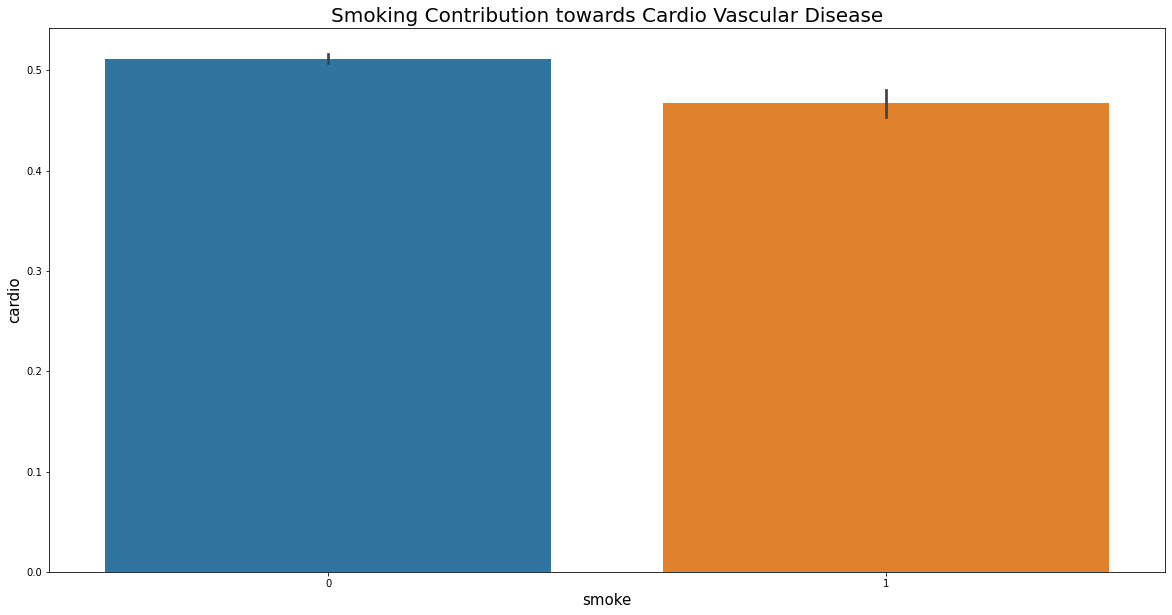

In [128]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Smoking Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("smoke",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "smoke", y = "cardio", ax=ax, data=data);

##### **Feature: Alcohol**

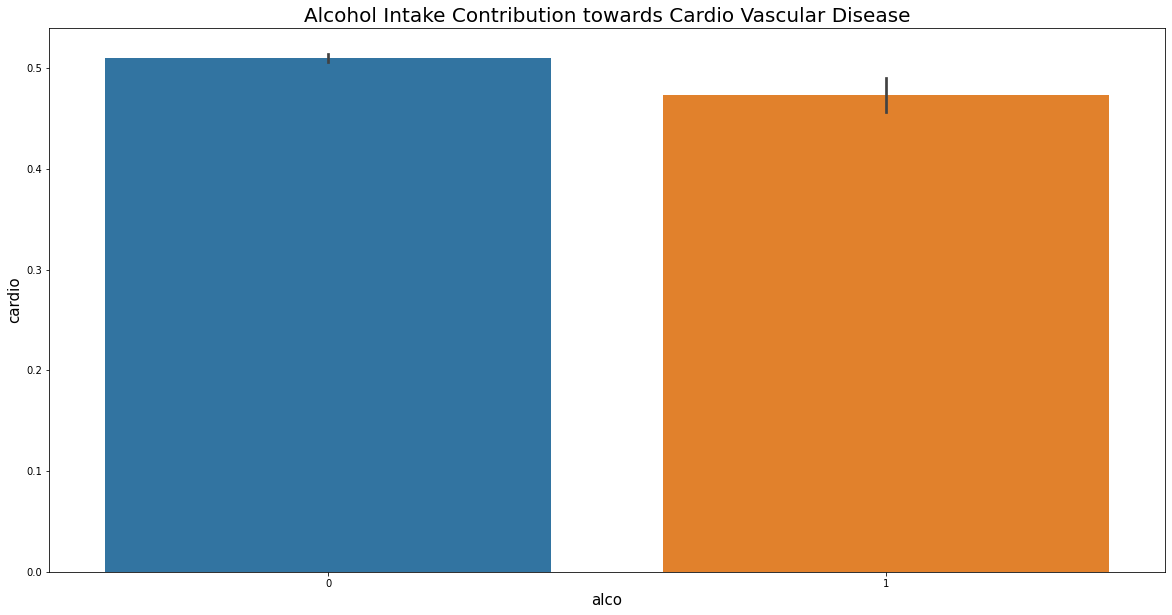

In [129]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Alcohol Intake Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("alco",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "alco", y = "cardio", ax=ax, data=data);

##### **Feature: Active Excercise**

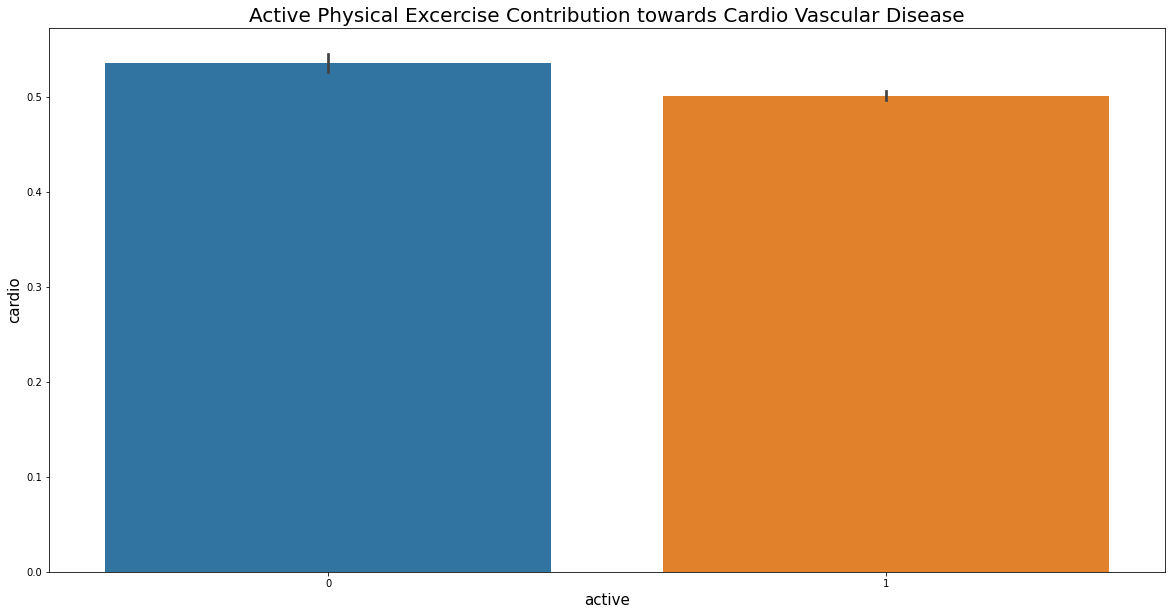

In [130]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Active Physical Excercise Contribution towards Cardio Vascular Disease",fontsize=20)
plt.xlabel("active",fontsize=15)
plt.ylabel("cardio",fontsize=15)
sns.barplot(x = "active", y = "cardio", ax=ax, data=data);

#### **Feature Creation from Exisiting Feature--> BMI**

##### Model 1

In [131]:
dataframe.shape

(53077, 12)

In [132]:
dataframe["BMI"] = dataframe["weight"] / (dataframe['height']**2)

In [133]:
dataframe.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,1.68,62,110,80,1,1,0,0,1,0,21.967120
1,55,1,1.56,85,140,90,3,1,0,0,1,1,34.927679
2,51,1,1.65,64,130,70,3,1,0,0,0,1,23.507805
3,48,2,1.69,82,150,100,1,1,0,0,1,1,28.710479
6,60,1,1.57,93,130,80,3,1,0,0,1,0,37.729725


##### Model 2

In [134]:
data.shape

(58700, 12)

In [135]:
data["BMI"] = data["weight"] / (data['height']**2)

In [136]:
data.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,1.68,62,110,80,1,1,0,0,1,0,21.967120
1,55,1,1.56,85,140,90,3,1,0,0,1,1,34.927679
2,51,1,1.65,64,130,70,3,1,0,0,0,1,23.507805
3,48,2,1.69,82,150,100,1,1,0,0,1,1,28.710479
4,47,1,1.56,56,100,60,1,1,0,0,0,0,23.011177


#### **Feature Selection on both dataset**

In [137]:
dataframe.shape, data.shape

((53077, 13), (58700, 13))

In [138]:
dataframe['cardio'].value_counts()

1    27076
0    26001
Name: cardio, dtype: int64

In [139]:
data['cardio'].value_counts()

1    29814
0    28886
Name: cardio, dtype: int64

In [140]:
print(f'Shape of Dataset after applying percentile technique {dataframe.shape}')
print(f'Shape of Dataset after applying domain knowledge technique {data.shape}')

Shape of Dataset after applying percentile technique (53077, 13)
Shape of Dataset after applying domain knowledge technique (58700, 13)


**Dataframe of Percentile Outlier Removal**

##### Model 2

**Univariate Selection**

In [141]:
data.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,1.68,62,110,80,1,1,0,0,1,0,21.967120
1,55,1,1.56,85,140,90,3,1,0,0,1,1,34.927679
2,51,1,1.65,64,130,70,3,1,0,0,0,1,23.507805
3,48,2,1.69,82,150,100,1,1,0,0,1,1,28.710479
4,47,1,1.56,56,100,60,1,1,0,0,0,0,23.011177


In [142]:
X = data[['age','gender','height','weight','systolicbp_high','diastolicbp_low','cholesterol','gluc','smoke','alco','active','BMI']]
y = data[['cardio']]

In [143]:
X.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,BMI
0,50,2,1.68,62,110,80,1,1,0,0,1,21.967120
1,55,1,1.56,85,140,90,3,1,0,0,1,34.927679
2,51,1,1.65,64,130,70,3,1,0,0,0,23.507805
3,48,2,1.69,82,150,100,1,1,0,0,1,28.710479
4,47,1,1.56,56,100,60,1,1,0,0,0,23.011177


In [144]:
y.head()

,cardio
0,0
1,1
2,1
3,1
4,0


In [145]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(X,y)

In [146]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [147]:
dataScore1 = pd.concat([dfcolumns,dfscores],axis=1)
dataScore1.columns = ['Feature','Score']

In [148]:
# Higher Score More Important is Feature
dataScore1

,Feature,Score
0,age,2831.986656
1,gender,0.039409
2,height,0.021278
3,weight,3972.081733
4,systolicbp_high,23346.451471
5,diastolicbp_low,7534.675972
6,cholesterol,909.477238
7,gluc,105.589242
8,smoke,34.537541
9,alco,15.258035


In [149]:
# Print Top 10 Features
print(dataScore1.nlargest(10,'Score'))

            Feature         Score
4   systolicbp_high  23346.451471
5   diastolicbp_low   7534.675972
3            weight   3972.081733
0               age   2831.986656
11              BMI   1585.946785
6       cholesterol    909.477238
7              gluc    105.589242
8             smoke     34.537541
9              alco     15.258035
10           active      9.365832


**Feature Importance**

In [150]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [151]:
print(model.feature_importances_) # Use inbuilt class features_importances of tree based classifiers

[0.17447574 0.01486692 0.13416135 0.14296097 0.18352586 0.10034761
 0.04256198 0.01758333 0.00770637 0.00696157 0.01046933 0.16437894]


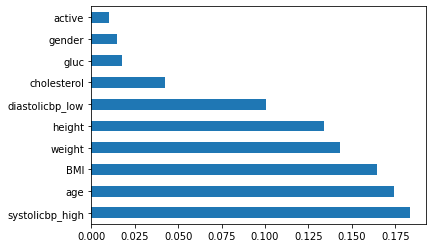

In [152]:
# Plot Graph of Features for Better Visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**Correlation Matrix with Heatmap**

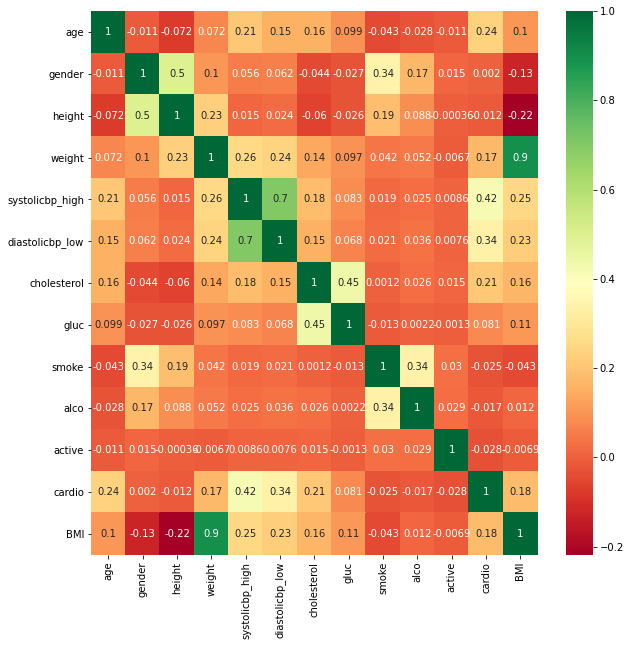

In [153]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
# Plot Heat Map
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn");

**Dataframe of Domain Knowledge Outlier Removal**

##### Model 1

**Univariate Selection**

In [154]:
dataframe.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,1.68,62,110,80,1,1,0,0,1,0,21.967120
1,55,1,1.56,85,140,90,3,1,0,0,1,1,34.927679
2,51,1,1.65,64,130,70,3,1,0,0,0,1,23.507805
3,48,2,1.69,82,150,100,1,1,0,0,1,1,28.710479
6,60,1,1.57,93,130,80,3,1,0,0,1,0,37.729725


In [155]:
dataframe.shape

(53077, 13)

In [156]:
X_ = dataframe[['age','gender','height','weight','systolicbp_high','diastolicbp_low','cholesterol','gluc','smoke','alco','active','BMI']]
y_ = dataframe[['cardio']]

In [157]:
X_.shape , y_.shape

((53077, 12), (53077, 1))

In [158]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures_ = SelectKBest(score_func=chi2,k=10)
fit_ = bestfeatures_.fit(X_,y_)

In [159]:
scores = pd.DataFrame(fit_.scores_)
columns = pd.DataFrame(X_.columns)

In [160]:
dataScore2 = pd.concat([columns,scores],axis=1)
dataScore2.columns = ['Feature','Score']

In [161]:
# Higher Score More Important is Feature
dataScore2

,Feature,Score
0,age,2361.228012
1,gender,0.646397
2,height,0.063616
3,weight,2873.429841
4,systolicbp_high,14654.211892
5,diastolicbp_low,4135.326467
6,cholesterol,798.748078
7,gluc,87.173455
8,smoke,41.246880
9,alco,18.530751


In [162]:
# Print Top 10 Features
print(dataScore2.nlargest(10,'Score'))

            Feature         Score
4   systolicbp_high  14654.211892
5   diastolicbp_low   4135.326467
3            weight   2873.429841
0               age   2361.228012
11              BMI   1218.631706
6       cholesterol    798.748078
7              gluc     87.173455
8             smoke     41.246880
9              alco     18.530751
10           active      8.295434


**Feature Importance**

In [163]:
model_ = ExtraTreesClassifier()
model_.fit(X_,y_)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [164]:
print(model_.feature_importances_) # Use inbuilt class features_importances of tree based classifiers

[0.17701596 0.0155556  0.1437505  0.15267143 0.17068963 0.07869862
 0.04089179 0.01817341 0.00739938 0.00720258 0.01190765 0.17604344]


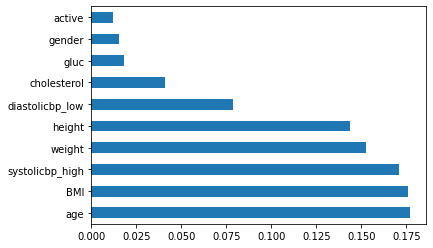

In [165]:
# Plot Graph of Features for Better Visualization
feat_importances_ = pd.Series(model_.feature_importances_, index=X_.columns)
feat_importances_.nlargest(10).plot(kind='barh')
plt.show()

**Correlation Matrix with Heatmap**

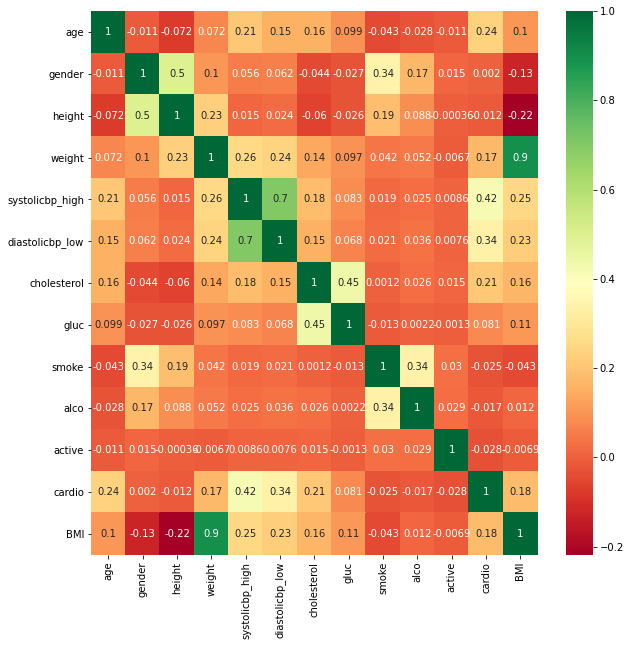

In [166]:
corrmat = dataframe.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
# Plot Heat Map
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn");

## **Machine Learning Algorithms and Evaluation**

### Dataset cleaned using Percentile Technique


In [167]:
dataframe.head()

,age,gender,height,weight,systolicbp_high,diastolicbp_low,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,1.68,62,110,80,1,1,0,0,1,0,21.967120
1,55,1,1.56,85,140,90,3,1,0,0,1,1,34.927679
2,51,1,1.65,64,130,70,3,1,0,0,0,1,23.507805
3,48,2,1.69,82,150,100,1,1,0,0,1,1,28.710479
6,60,1,1.57,93,130,80,3,1,0,0,1,0,37.729725


In [168]:
dataframe = dataframe.drop(["gender","gluc","cholesterol","smoke","alco","active"],axis=1)

In [169]:
# Value Count
dataframe["cardio"].value_counts()

1    27076
0    26001
Name: cardio, dtype: int64

In [170]:
# Size of Dataframe
len(dataframe)

53077

In [171]:
# Some Column Information
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53077 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              53077 non-null  int64  
 1   height           53077 non-null  float64
 2   weight           53077 non-null  int64  
 3   systolicbp_high  53077 non-null  int64  
 4   diastolicbp_low  53077 non-null  int64  
 5   cardio           53077 non-null  int64  
 6   BMI              53077 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 5.7 MB


In [172]:
# Some Statistical Information
dataframe.describe()

,age,height,weight,systolicbp_high,diastolicbp_low,cardio,BMI
count,53077.000000,53077.000000,53077.000000,53077.000000,53077.000000,53077.000000,53077.000000
mean,52.918251,1.643126,74.168152,126.595927,81.809861,0.510127,27.513080
std,6.757221,0.061619,12.798602,13.856464,7.679952,0.499902,4.821239
min,29.000000,1.520000,50.000000,100.000000,70.000000,0.000000,16.141529
25%,48.000000,1.600000,65.000000,120.000000,80.000000,0.000000,23.951227
50%,54.000000,1.650000,72.000000,120.000000,80.000000,1.000000,26.562500
75%,58.000000,1.690000,82.000000,140.000000,90.000000,1.000000,30.323343
max,64.000000,1.770000,120.000000,160.000000,100.000000,1.000000,51.073407


In [173]:
X = dataframe.drop("cardio",axis=1)
y = dataframe["cardio"]

In [174]:
X.head()

,age,height,weight,systolicbp_high,diastolicbp_low,BMI
0,50,1.68,62,110,80,21.967120
1,55,1.56,85,140,90,34.927679
2,51,1.65,64,130,70,23.507805
3,48,1.69,82,150,100,28.710479
6,60,1.57,93,130,80,37.729725


In [175]:
y.head()

0    0
1    1
2    1
3    1
6    0
Name: cardio, dtype: int64

In [176]:
# Split data into train and test sets
np.random.seed(42)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [178]:
len(X_train), len(X_test), len(y_train), len(y_test)

(42461, 10616, 42461, 10616)

#### Model 1: Logistic Regression

In [179]:
log_model = LogisticRegression()

In [180]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
y_prediction = log_model.predict(X_test)

##### Score

In [182]:
log_model.score(X_test,y_test)

0.7078937452901282

##### Classification Report

In [183]:
# Classification Report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      5188
           1       0.73      0.67      0.70      5428

    accuracy                           0.71     10616
   macro avg       0.71      0.71      0.71     10616
weighted avg       0.71      0.71      0.71     10616



##### Confsuion Matrix

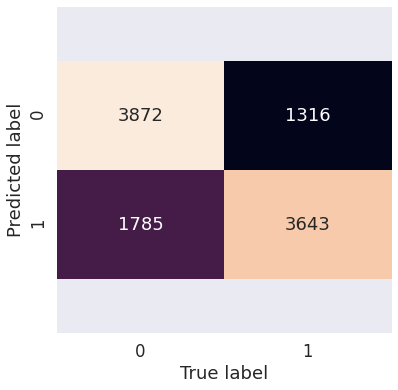

In [184]:
# Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_prediction)

##### ROC_AUC_Curve Score

In [185]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Area Under Curve - Receiver Operating Characteristic (AUC-ROC) Curve')
    plt.legend()
    plt.show()

In [186]:
probs = log_model.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.77


In [187]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

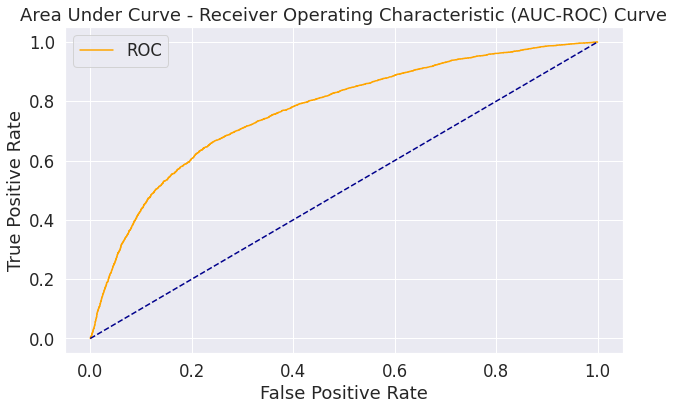

In [188]:
plot_roc_curve(fpr, tpr)

##### 5-fold Cross Validation Score

In [189]:
# Cross-validated accuracy score
cv_acc = cross_val_score(log_model,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.71081387, 0.71062547, 0.71116345, 0.70645313, 0.70259067])

#### Model 1: Logistic Regression Hyperparameter Tuning

In [190]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [191]:
np.random.seed(42)

In [192]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [193]:
rs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [194]:
logisticModel = rs_log_reg.best_estimator_

In [195]:
logisticModel

LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
logisticModel.fit(X_train, y_train)

LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [197]:
predict = logisticModel.predict(X_test)

##### Score

In [198]:
logisticModel.score(X_test, y_test)

0.7088357196684251

##### Classification Report

In [199]:
# Classification Report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.68      0.75      0.72      5188
           1       0.74      0.67      0.70      5428

    accuracy                           0.71     10616
   macro avg       0.71      0.71      0.71     10616
weighted avg       0.71      0.71      0.71     10616



##### Confusion Matrix

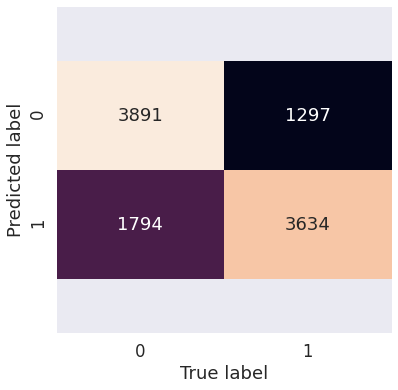

In [200]:
# Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, predict)

##### ROC-AUC Curve Score

In [201]:
probs = logisticModel.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.77


In [202]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

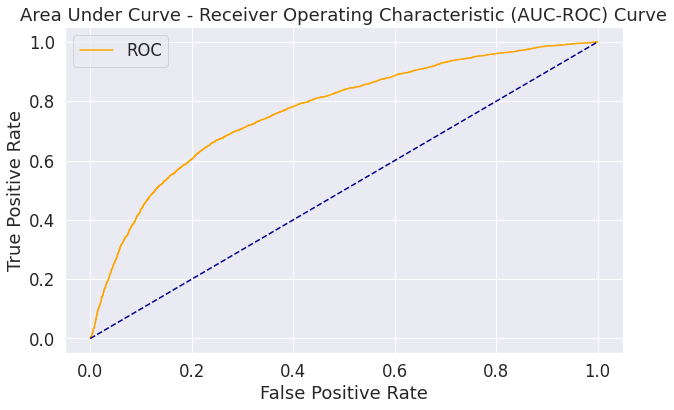

In [203]:
plot_roc_curve(fpr, tpr)

##### 5 fold Cross Validation

In [204]:
# Cross-validated accuracy score
cv_acc = cross_val_score(logisticModel,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.7094009 , 0.71081387, 0.71304757, 0.70796043, 0.70211964])

#### Model 2: Random Forest Classifier

In [205]:
ran_model = RandomForestClassifier()

In [206]:
ran_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [207]:
y_pred = ran_model.predict(X_test)

##### Score

In [208]:
ran_model.score(X_test,y_test)

0.6529766390354182

##### Classification Report

In [209]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64      5188
           1       0.66      0.67      0.66      5428

    accuracy                           0.65     10616
   macro avg       0.65      0.65      0.65     10616
weighted avg       0.65      0.65      0.65     10616



##### Confusion Matrix

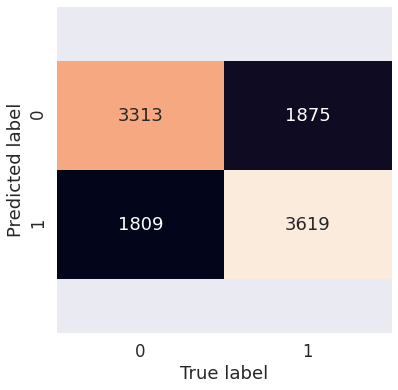

In [210]:
# Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_pred)

##### ROC AUC Curve Score

In [211]:
probs = ran_model.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.70


In [212]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

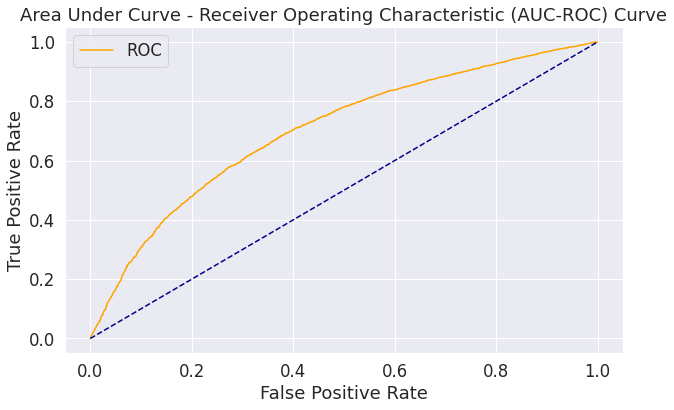

In [213]:
plot_roc_curve(fpr, tpr)

##### 5 Fold Cross Validation

In [214]:
# Cross-validated accuracy score
cv_acc = cross_val_score(ran_model,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.6471364 , 0.65957046, 0.65718323, 0.65859633, 0.65482807])

#### Model 2: Random Forest Classifier Hyperparameter Tuning

In [215]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [216]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

In [217]:
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 17.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [218]:
rs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 11,
 'min_samples_split': 2,
 'n_estimators': 160}

In [219]:
randomForest = rs_rf.best_estimator_

In [220]:
randomForest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [221]:
randomForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [222]:
y_pred = randomForest.predict(X_test)

##### Score

In [223]:
randomForest.score(X_test, y_test)

0.7120384325546345

##### Classification Report

In [224]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72      5188
           1       0.73      0.69      0.71      5428

    accuracy                           0.71     10616
   macro avg       0.71      0.71      0.71     10616
weighted avg       0.71      0.71      0.71     10616



##### Confusion Matrix

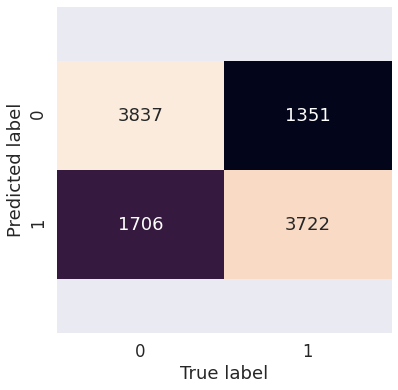

In [225]:
# Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_pred)

##### ROC-AUC Curve Score

In [226]:
probs = randomForest.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.77


In [227]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

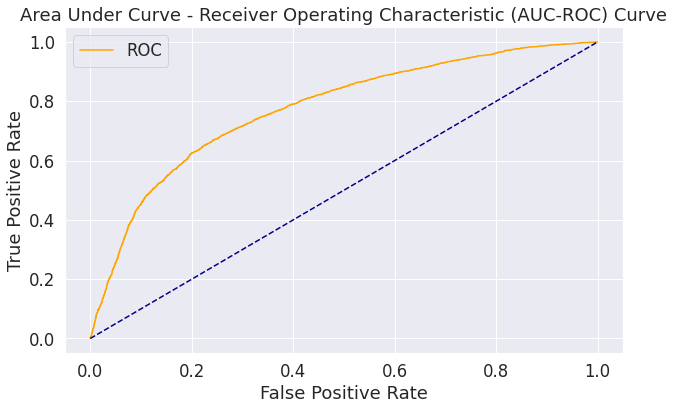

In [228]:
plot_roc_curve(fpr, tpr)

##### 5 Fold Cross Validation

In [229]:
# Cross-validated accuracy score
cv_acc = cross_val_score(randomForest,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.71166164, 0.71552374, 0.71238813, 0.71210551, 0.70372115])

#### Model 3: XG Boost

In [230]:
modelXG = XGBClassifier()

In [231]:
modelXG.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [232]:
y_pred = modelXG.predict(X_test)

##### Score

In [233]:
modelXG.score(X_test,y_test)

0.7105312735493594

#####  Classification Report

In [234]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      5188
           1       0.73      0.69      0.71      5428

    accuracy                           0.71     10616
   macro avg       0.71      0.71      0.71     10616
weighted avg       0.71      0.71      0.71     10616



##### Confusion Matrix

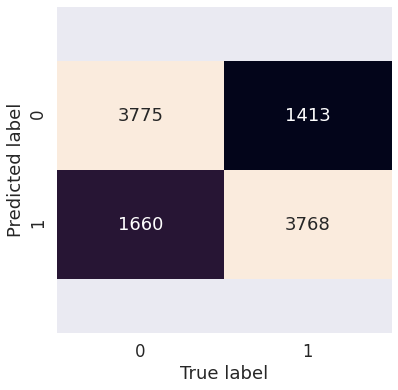

In [235]:
# Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_pred)

##### ROC-AUC Curve Score

In [236]:
probs = modelXG.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.78


In [237]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

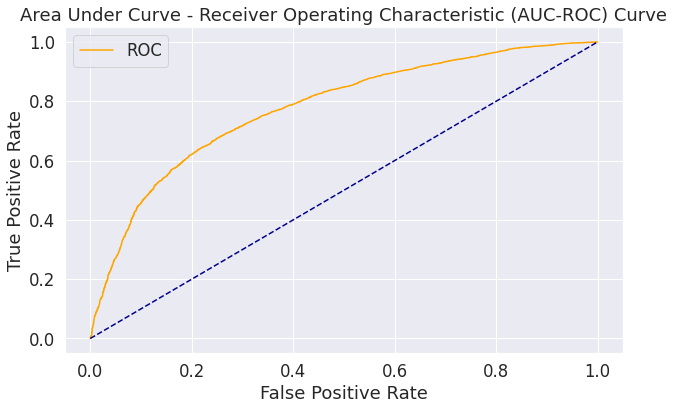

In [238]:
plot_roc_curve(fpr, tpr)

##### 5 Fold Cross Validation

In [239]:
# Cross-validated accuracy score
cv_acc = cross_val_score(modelXG,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.71288621, 0.71467596, 0.71370702, 0.7134244 , 0.70607631])

#### Model 3: XGBoost Hyperparameter Tuning

In [240]:
grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
        "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
        "min_child_weight" : [ 1, 3, 5, 7 ],
        "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
        "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [241]:
xg_cr = RandomizedSearchCV(XGBClassifier(), 
                           param_distributions=grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

In [242]:
xg_cr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'colsample_bytree':

In [243]:
xg_cr.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.25,
 'max_depth': 3,
 'min_child_weight': 3}

In [244]:
gradientBoost = xg_cr.best_estimator_

In [245]:
gradientBoost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [246]:
gradientBoost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [247]:
y_pred = gradientBoost.predict(X_test)

##### Score

In [248]:
gradientBoost.score(X_test,y_test)

0.7113790504898266

##### Classification Report

In [249]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      5188
           1       0.73      0.69      0.71      5428

    accuracy                           0.71     10616
   macro avg       0.71      0.71      0.71     10616
weighted avg       0.71      0.71      0.71     10616



##### Confusion Matrix

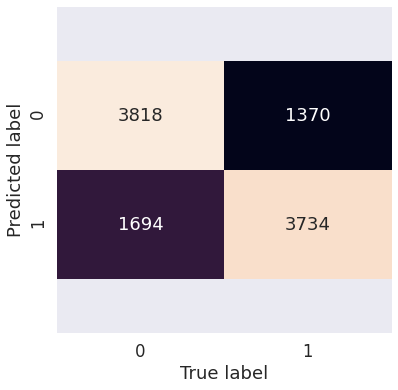

In [250]:
# Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_pred)

##### ROC-AUC Curve Score

In [251]:
probs = gradientBoost.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.78


In [252]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

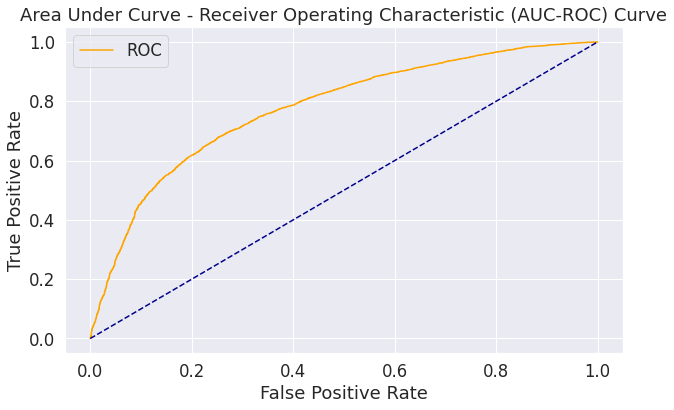

In [253]:
plot_roc_curve(fpr, tpr)

##### 5 fold Cross Validation

In [254]:
# Cross-validated accuracy score
cv_acc = cross_val_score(gradientBoost,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.71185004, 0.71524115, 0.71351861, 0.7119171 , 0.70494583])

#### Model 4: Naive Bayes Classifier

In [255]:
gaussianNB = GaussianNB()

In [256]:
gaussianNB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [257]:
predict = gaussianNB.predict(X_test)

##### Score

In [258]:
gaussianNB.score(X_test,y_test)

0.6971552373775434

##### Classification Report

In [259]:
# Classification Report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.66      0.78      0.72      5188
           1       0.75      0.61      0.67      5428

    accuracy                           0.70     10616
   macro avg       0.70      0.70      0.70     10616
weighted avg       0.71      0.70      0.70     10616



##### Confusion Matrix

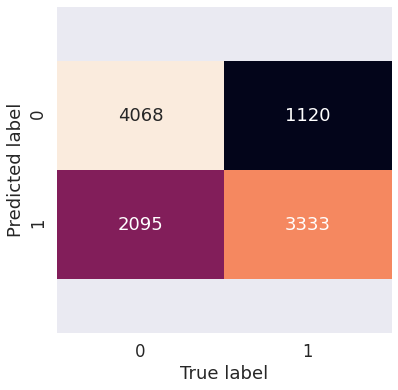

In [260]:
# Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test,predict)

##### ROC-AUC Curve Score

In [261]:
probs = gaussianNB.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.76


In [262]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

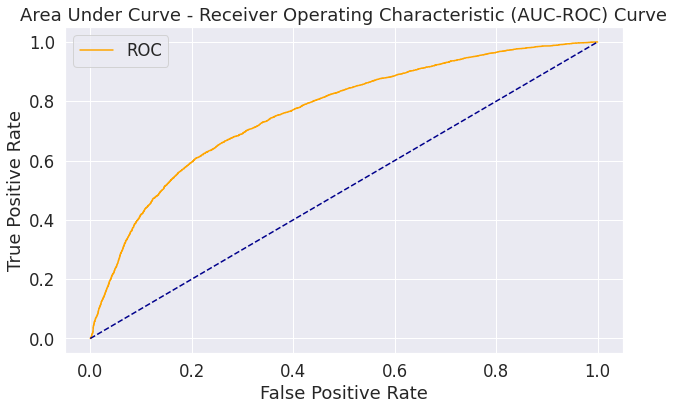

In [263]:
plot_roc_curve(fpr, tpr)

##### 5 fold Cross Validation

In [264]:
# Cross-validated accuracy score
cv_acc = cross_val_score(gaussianNB,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.70384326, 0.6947061 , 0.69627885, 0.69147433, 0.69043806])

#### Model 4: Naive Bayes Classifier Hyper parameter Tuning

In [265]:
grid = {'var_smoothing': np.logspace(0,-9,num=100)}

In [266]:
guassNB = RandomizedSearchCV(GaussianNB(), 
                           param_distributions=grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

In [267]:
guassNB.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.000000...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=True)

In [268]:
guassNB.best_params_

{'var_smoothing': 0.657933224657568}

In [269]:
bestNB = guassNB.best_estimator_

In [270]:
bestNB

GaussianNB(priors=None, var_smoothing=0.657933224657568)

In [271]:
bestNB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=0.657933224657568)

In [272]:
prediction = bestNB.predict(X_test)

##### Score

In [273]:
bestNB.score(X_test,y_test)

0.6975320271288621

##### Classification Report

In [274]:
# Classification Report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.65      0.82      0.73      5188
           1       0.77      0.58      0.66      5428

    accuracy                           0.70     10616
   macro avg       0.71      0.70      0.69     10616
weighted avg       0.71      0.70      0.69     10616



##### Confusion Matrix

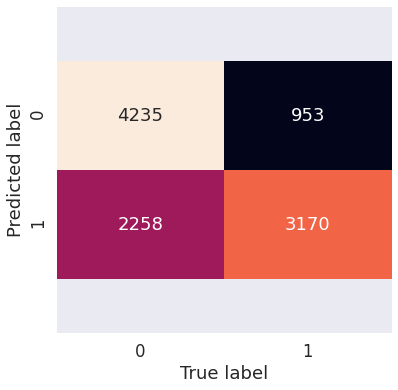

In [275]:
# Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test,prediction)

##### ROC-AUC Curve Score

In [276]:
probs = bestNB.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.76


In [277]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

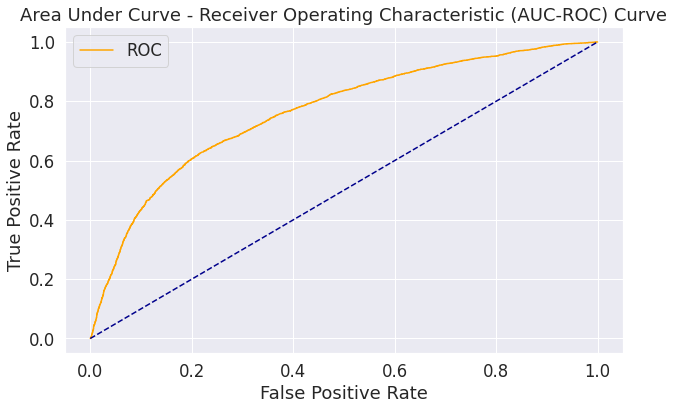

In [278]:
plot_roc_curve(fpr, tpr)

##### 5 fold Cross Validation

In [279]:
# Cross-validated accuracy score
cv_acc = cross_val_score(bestNB,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.70280708, 0.69922758, 0.7000471 , 0.69420631, 0.69213377])

### Dataset cleaned using Domain Knowledge Technique


In [283]:
data.head()

,age,height,weight,systolicbp_high,diastolicbp_low,cholesterol,cardio,BMI
0,50,1.68,62,110,80,1,0,21.967120
1,55,1.56,85,140,90,3,1,34.927679
2,51,1.65,64,130,70,3,1,23.507805
3,48,1.69,82,150,100,1,1,28.710479
4,47,1.56,56,100,60,1,0,23.011177


In [284]:
# data = data.drop(["gender","gluc","cholesterol","smoke","alco","active"],axis=1)
data = data.drop(["cholesterol"],axis=1)

In [285]:
data["cardio"].value_counts()

1    29814
0    28886
Name: cardio, dtype: int64

In [286]:
len(data)

58700

In [287]:
# Some Info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58700 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              58700 non-null  int64  
 1   height           58700 non-null  float64
 2   weight           58700 non-null  int64  
 3   systolicbp_high  58700 non-null  int64  
 4   diastolicbp_low  58700 non-null  int64  
 5   cardio           58700 non-null  int64  
 6   BMI              58700 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 6.1 MB


In [288]:
# Some Statistical Info
data.describe()

,age,height,weight,systolicbp_high,diastolicbp_low,cardio,BMI
count,58700.000000,58700.000000,58700.000000,58700.000000,58700.000000,58700.000000,58700.000000
mean,52.835162,1.645068,74.242027,126.866797,81.416951,0.507905,27.473879
std,6.785912,0.064131,12.977178,16.818866,9.609048,0.499942,4.850842
min,29.000000,1.520000,50.000000,70.000000,50.000000,0.000000,15.780836
25%,48.000000,1.600000,65.000000,120.000000,80.000000,0.000000,23.889463
50%,53.000000,1.650000,72.000000,120.000000,80.000000,1.000000,26.502116
75%,58.000000,1.690000,82.000000,140.000000,90.000000,1.000000,30.119402
max,64.000000,1.780000,120.000000,240.000000,150.000000,1.000000,51.073407


In [289]:
X = data.drop("cardio",axis=1)
y = data["cardio"]

In [290]:
np.random.seed(42)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [292]:
len(X_train), len(X_test), len(y_train), len(y_test)

(46960, 11740, 46960, 11740)

#### Model 1: Logistic Regression

In [293]:
modelLR = LogisticRegression()

In [294]:
modelLR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [295]:
y_prediction = modelLR.predict(X_test)

##### Score

In [296]:
modelLR.score(X_test,y_test)

0.7178023850085179

##### Classification Report

In [297]:
# Classification Report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      5767
           1       0.74      0.69      0.71      5973

    accuracy                           0.72     11740
   macro avg       0.72      0.72      0.72     11740
weighted avg       0.72      0.72      0.72     11740



##### Confusion Matrix

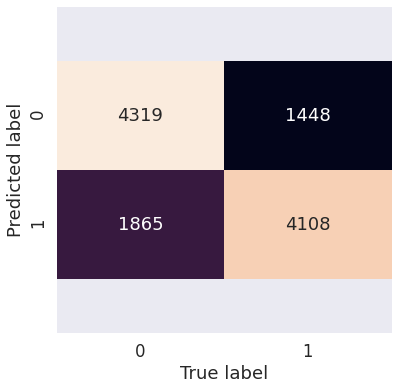

In [298]:
# Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_prediction)

##### ROC-AUC Curve Score

In [299]:
probs = modelLR.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.78


In [300]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

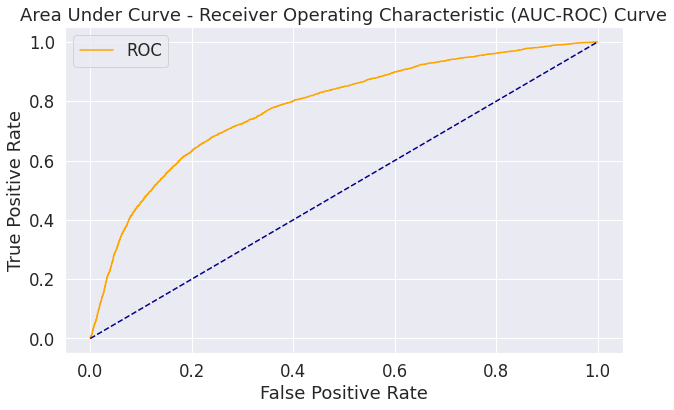

In [301]:
plot_roc_curve(fpr, tpr)

##### 5 fold Cross Validation

In [302]:
# Cross-validated accuracy score
cv_acc = cross_val_score(modelLR,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.71516184, 0.71703578, 0.71805792, 0.7120954 , 0.70800681])

#### Model 1: Logistic Regression Hyper Parameter Tuning

In [303]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [304]:
np.random.seed(42)

In [305]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [306]:
rs_log_reg.best_params_

{'C': 0.03359818286283781, 'solver': 'liblinear'}

In [307]:
logModel = rs_log_reg.best_estimator_

In [308]:
logModel

LogisticRegression(C=0.03359818286283781, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [309]:
logModel.fit(X_train, y_train)

LogisticRegression(C=0.03359818286283781, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [310]:
predict = logModel.predict(X_test)

##### Score

In [311]:
logModel.score(X_test, y_test)

0.7192504258943782

##### Classification Report

In [312]:
# Classification Report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      5767
           1       0.75      0.68      0.71      5973

    accuracy                           0.72     11740
   macro avg       0.72      0.72      0.72     11740
weighted avg       0.72      0.72      0.72     11740



##### Confusion Matrix

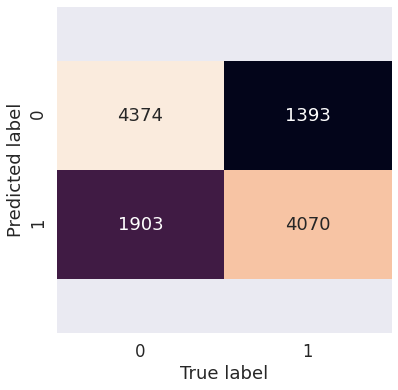

In [313]:
# Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, predict)

##### ROC-AUC Curve Score

In [314]:
probs = logModel.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.78


In [315]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

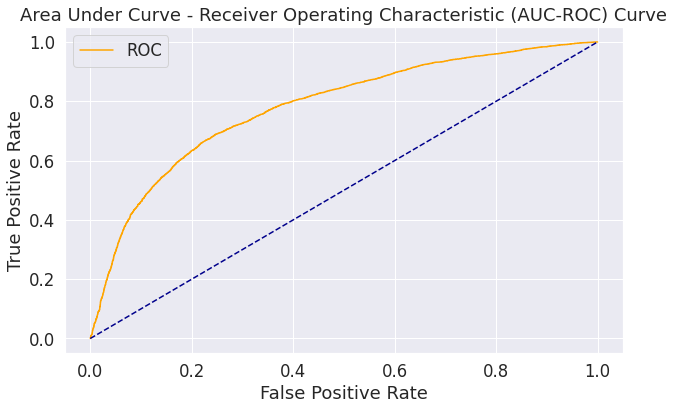

In [316]:
plot_roc_curve(fpr, tpr)

##### Cross Validation

In [317]:
# Cross-validated accuracy score
cv_acc = cross_val_score(logModel,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.71422487, 0.71660988, 0.71890971, 0.71388416, 0.71005111])

#### Model 2: Random Forest Classifier

In [318]:
modelRF = RandomForestClassifier()

In [319]:
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [320]:
y_pred = modelRF.predict(X_test)

##### Score

In [321]:
modelRF.score(X_test,y_test)

0.667717206132879

##### Classification Report

In [322]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      5767
           1       0.68      0.67      0.67      5973

    accuracy                           0.67     11740
   macro avg       0.67      0.67      0.67     11740
weighted avg       0.67      0.67      0.67     11740



##### Confusion Matrix

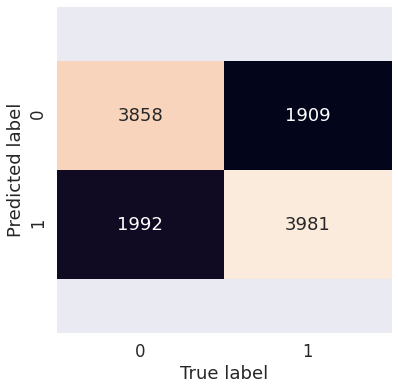

In [323]:
# Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_pred)

##### ROC-AUC Curve Score

In [324]:
probs = modelRF.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.72


In [325]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

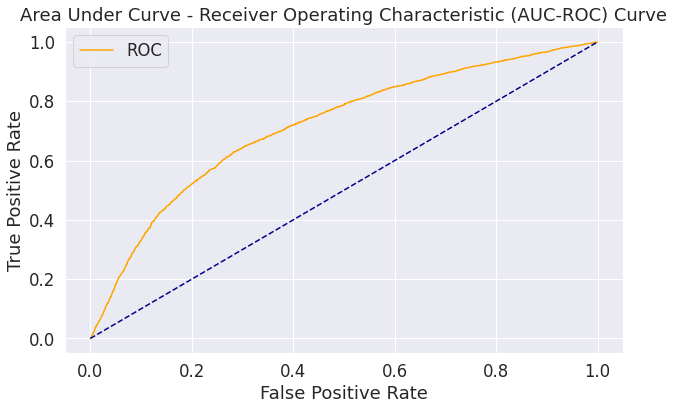

In [326]:
plot_roc_curve(fpr, tpr)

##### 5 Fold Cross Validation

In [327]:
# Cross-validated accuracy score
cv_acc = cross_val_score(modelRF,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.65834753, 0.6729983 , 0.66873935, 0.66950596, 0.6665247 ])

#### Model 2: Random Forest Classifier Hyper Parameter Tuning

In [328]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [329]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

In [330]:
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 19.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [331]:
rs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 15,
 'min_samples_split': 18,
 'n_estimators': 660}

In [332]:
randForest = rs_rf.best_estimator_

In [333]:
randForest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=18,
                       min_weight_fraction_leaf=0.0, n_estimators=660,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [334]:
randForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=18,
                       min_weight_fraction_leaf=0.0, n_estimators=660,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [335]:
y_pred = randForest.predict(X_test)

##### Score

In [336]:
randForest.score(X_test, y_test)

0.7224872231686542

##### Classification Report

In [337]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      5767
           1       0.75      0.69      0.72      5973

    accuracy                           0.72     11740
   macro avg       0.72      0.72      0.72     11740
weighted avg       0.72      0.72      0.72     11740



##### Confusion Matrix

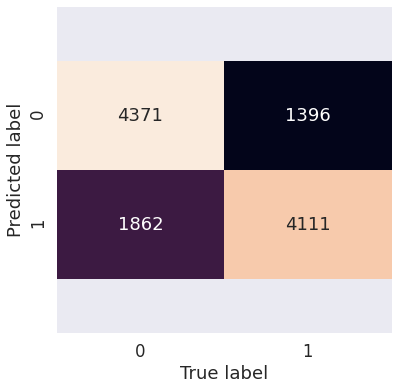

In [338]:
# Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_pred)

##### ROC - AUC Curve Score

In [339]:
probs = randForest.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.79


In [340]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

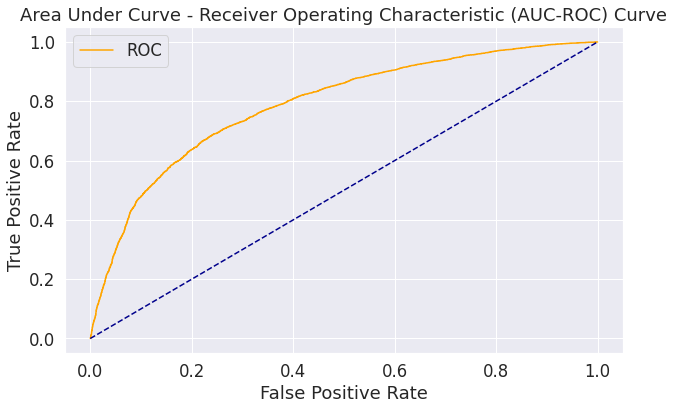

In [341]:
plot_roc_curve(fpr, tpr)

##### 5 Fold Cross Validation

In [342]:
# Cross-validated accuracy score
cv_acc = cross_val_score(randForest,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.71720613, 0.72240204, 0.72010221, 0.71984668, 0.71175468])

#### Model 3: XGBoost Classifier

In [343]:
XGmodel = XGBClassifier()

In [344]:
XGmodel.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [345]:
y_pred = XGmodel.predict(X_test)

##### Score

In [346]:
XGmodel.score(X_test,y_test)

0.7212947189097104

##### Classification Report

In [347]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73      5767
           1       0.74      0.69      0.72      5973

    accuracy                           0.72     11740
   macro avg       0.72      0.72      0.72     11740
weighted avg       0.72      0.72      0.72     11740



##### Confusion Matrix

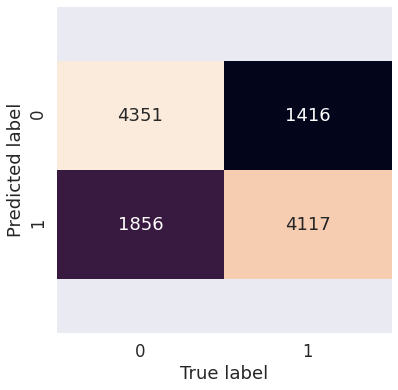

In [348]:
# Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_pred)

##### ROC-AUC Curve Score

In [350]:
probs = XGmodel.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.79


In [351]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

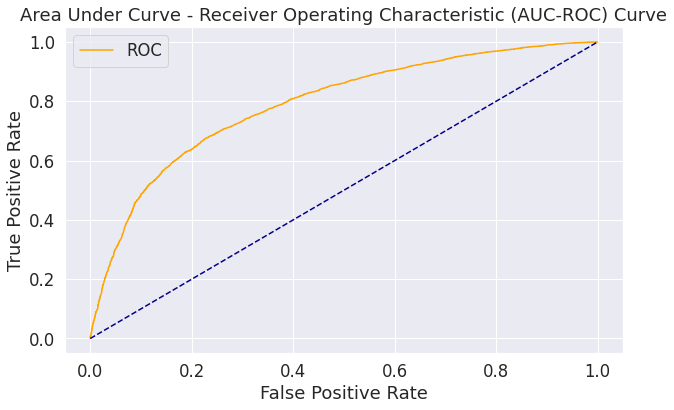

In [352]:
plot_roc_curve(fpr, tpr)

##### 5 Fold Cross Validation

In [353]:
# Cross-validated accuracy score
cv_acc = cross_val_score(XGmodel,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.71763203, 0.72470187, 0.72172061, 0.72069847, 0.71337308])

#### Model 3: XGBoost Classifier Hyper Parameter Tuning

In [354]:
grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
        "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
        "min_child_weight" : [ 1, 3, 5, 7 ],
        "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
        "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [355]:
xg_cr = RandomizedSearchCV(XGBClassifier(), 
                           param_distributions=grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

In [356]:
xg_cr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'colsample_bytree':

In [357]:
xg_cr.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.3,
 'learning_rate': 0.3,
 'max_depth': 3,
 'min_child_weight': 5}

In [358]:
gd = xg_cr.best_estimator_

In [359]:
gd

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [360]:
gd.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [361]:
y_pred = gd.predict(X_test)

##### Score

In [362]:
gd.score(X_test,y_test)

0.7213798977853493

##### Classification Report

In [363]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      5767
           1       0.75      0.68      0.71      5973

    accuracy                           0.72     11740
   macro avg       0.72      0.72      0.72     11740
weighted avg       0.72      0.72      0.72     11740



##### Confusion Matrix

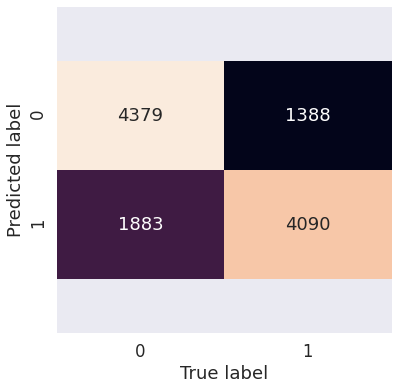

In [364]:
# Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_pred)

##### ROC-AUC Curve Score

In [365]:
probs = gd.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.79


In [366]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

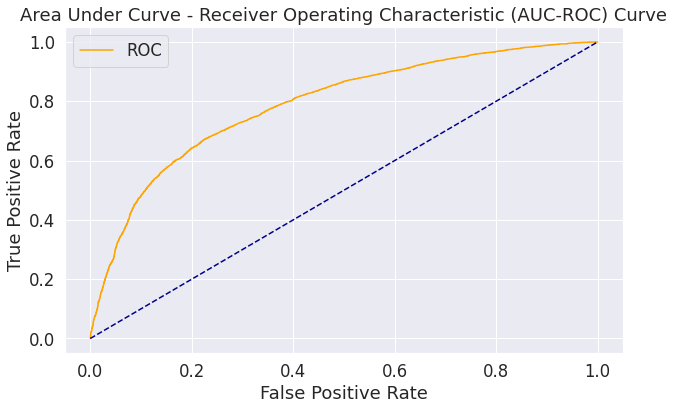

In [367]:
plot_roc_curve(fpr, tpr)

##### 5 fold Cross Validation

In [368]:
# Cross-validated accuracy score
cv_acc = cross_val_score(gd,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.7165247 , 0.72342419, 0.720954  , 0.71771721, 0.71337308])

#### Model 4: Naive Bayes Classifier

In [369]:
gNB = GaussianNB()

In [370]:
gNB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [371]:
predict = gNB.predict(X_test)

##### Score

In [372]:
gNB.score(X_test,y_test)

0.7024701873935264

##### Classification Report

In [373]:
# Classification Report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72      5767
           1       0.75      0.62      0.68      5973

    accuracy                           0.70     11740
   macro avg       0.71      0.70      0.70     11740
weighted avg       0.71      0.70      0.70     11740



##### Confusion Matrix

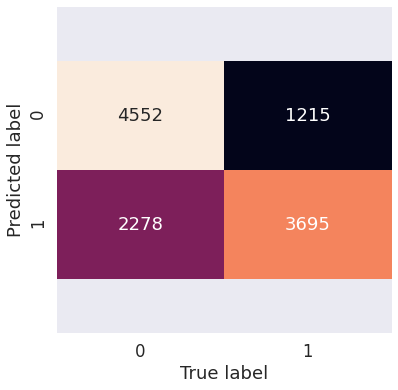

In [374]:
# Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test,predict)

##### ROC-AUC Curve Score

In [375]:
probs = gNB.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.77


In [376]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

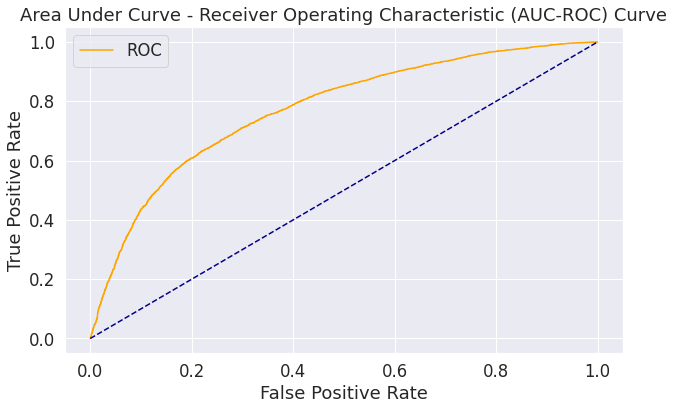

In [377]:
plot_roc_curve(fpr, tpr)

##### 5 Fold Cross Validation

In [378]:
# Cross-validated accuracy score
cv_acc = cross_val_score(gNB,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.70349233, 0.70110733, 0.69948893, 0.69821124, 0.69582624])

#### Model 4: Naive Bayes Classifier Hyper Parameter Tuning

In [379]:
grid = {'var_smoothing': np.logspace(0,-9,num=100)}

In [380]:
guassNB = RandomizedSearchCV(GaussianNB(), 
                           param_distributions=grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

In [381]:
guassNB.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.000000...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=True)

In [382]:
guassNB.best_params_

{'var_smoothing': 0.08111308307896872}

In [383]:
NBG = guassNB.best_estimator_

In [384]:
NBG

GaussianNB(priors=None, var_smoothing=0.08111308307896872)

In [385]:
NBG.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=0.08111308307896872)

In [386]:
prediction = NBG.predict(X_test)

##### Score

In [387]:
NBG.score(X_test,y_test)

0.7038330494037479

##### Classification Report

In [388]:
# Classification Report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.66      0.81      0.73      5767
           1       0.76      0.61      0.68      5973

    accuracy                           0.70     11740
   macro avg       0.71      0.71      0.70     11740
weighted avg       0.71      0.70      0.70     11740



##### Confusion Matrix

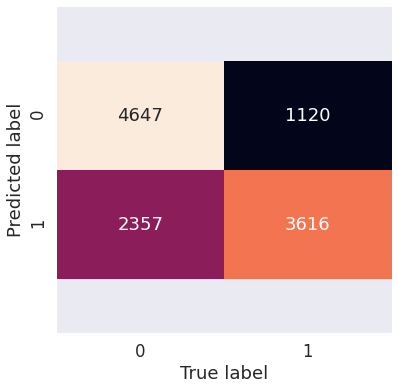

In [390]:
# Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test,prediction)

##### ROC-AUC Curve Score

In [391]:
probs = guassNB.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.77


In [392]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

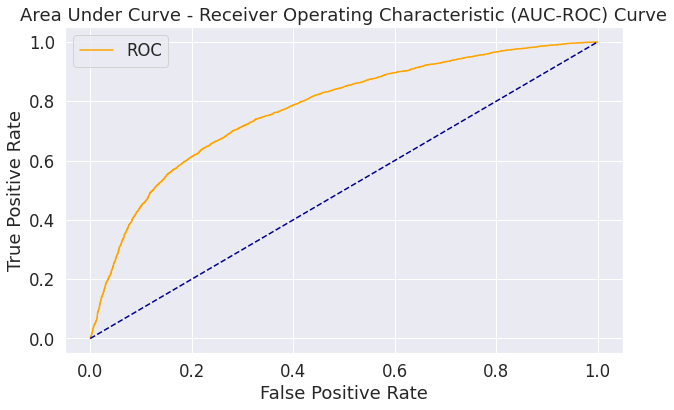

In [393]:
plot_roc_curve(fpr, tpr)

##### 5 fold Cross Validation

In [394]:
# Cross-validated accuracy score
cv_acc = cross_val_score(NBG,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.70647359, 0.70417376, 0.70340716, 0.70085179, 0.69761499])

#### Model Saving

In [396]:
# Model Percentile Method
# Logistic Regression
pickle.dump(log_model,open("PercentileLRNormal.pkl","wb"));
pickle.dump(logisticModel,open("PercentileLRHyper.pkl","wb"));
# Random Forest
pickle.dump(ran_model,open("PercentileRFNormal.pkl","wb"));
pickle.dump(randomForest,open("PercentileRFHyper.pkl","wb"));
# XGBoost
pickle.dump(modelXG,open("PercentileXGNormal.pkl","wb"));
pickle.dump(gradientBoost,open("PercentileXGHyper.pkl","wb"));
# Navie Bayes
pickle.dump(gaussianNB,open("PercentileNBNormal.pkl","wb"));
pickle.dump(bestNB,open("PercentileNBHyper.pkl","wb"));

In [397]:
# Model Domain Knowledge Method
# Logistic Regression
pickle.dump(modelLR,open("DomainLRNormal.pkl","wb"));
pickle.dump(logModel,open("DomainLRHyper.pkl","wb"));
# Random Forest
pickle.dump(modelRF,open("DomainRFNormal.pkl","wb"));
pickle.dump(randForest,open("DomainRFHyper.pkl","wb"));
# XGBoost
pickle.dump(XGmodel,open("DomainXGNormal.pkl","wb"));
pickle.dump(gd,open("DomainXGHyper.pkl","wb"));
# Navie Bayes
pickle.dump(gNB,open("DomainNBNormal.pkl","wb"));
pickle.dump(NBG,open("DomaineNBHyper.pkl","wb"));